# Data Analysis

In [9]:
import pandas as pd
import numpy as np
import os
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from invesscience.joanna_merge_2 import get_training_data 

In [4]:
companies = get_training_data(reference="a")

        id  mean_comp_worked_before
0      c:1                     0.50
1   c:1001                     0.75
2  c:10015                     0.00
3   c:1003                     0.50
4  c:10054                     0.00
        id    normalized_name    category_code founded_at  \
0   c:1349      move networks         software        NaT   
1   c:4584        modern feed      games_video 2007-01-01   
2  c:16612  micron technology    semiconductor 1978-01-01   
3     c:28              cisco  network_hosting 1984-01-01   
4     c:29              yahoo              web 1994-01-01   

                                         description closed_at    status  \
0  software Move Networks is a streaming tech pla...       NaN  acquired   
1  games_video     [Modern Feed](http://www.moder...       NaN  acquired   
2  semiconductor   Semiconductor Applications Mic...       NaN       ipo   
3  network_hosting     Cisco designs and sells ha...       NaN       ipo   
4  web   News and On-line directory Y

In [5]:
companies.head()

,id,normalized_name,category_code,founded_at,description,closed_at,status,exit,exit_date,country_code,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
0,c:1349,move networks,software,NaT,software Move Networks is a streaming tech pla...,NaN,acquired,acquisition,1987-06-16 00:00:00,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,c:4584,modern feed,games_video,2007-01-01,games_video [Modern Feed](http://www.moder...,NaN,acquired,acquisition,1987-06-16 00:00:00,USA,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,c:16612,micron technology,semiconductor,1978-01-01,semiconductor Semiconductor Applications Mic...,NaN,ipo,ipo,1990-01-02 00:00:00,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,c:28,cisco,network_hosting,1984-01-01,network_hosting Cisco designs and sells ha...,NaN,ipo,ipo,1990-02-23 00:00:00,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,c:29,yahoo,web,1994-01-01,web News and On-line directory Yahoo was fou...,NaN,ipo,ipo,1996-04-12 00:00:00,USA,...,0.2,1.0,0.0,1.0,0.0,0.0,1.2,0.0,0.0,1


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 0 to 3240
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         3241 non-null   object        
 1   normalized_name            3241 non-null   object        
 2   category_code              3115 non-null   object        
 3   founded_at                 2642 non-null   datetime64[ns]
 4   description                3239 non-null   object        
 5   closed_at                  360 non-null    object        
 6   status                     3241 non-null   object        
 7   exit                       3241 non-null   object        
 8   exit_date                  797 non-null    object        
 9   country_code               3118 non-null   object        
 10  state_code                 2241 non-null   object        
 11  date_series_a              3241 non-null   datetime64[ns]
 12  partic

In [7]:
companies.columns

Index(['id', 'normalized_name', 'category_code', 'founded_at', 'description',
       'closed_at', 'status', 'exit', 'exit_date', 'country_code',
       'state_code', 'date_series_a', 'participants_a', 'raised_amount_usd_a',
       'timediff_founded_series_a', 'rounds_before_a', 'raised_before_a',
       'participants_before_a', 'phd', 'MBA', 'cs', 'graduate', 'undergrad',
       'professional', 'degree_count', 'MBA_bool', 'cs_bool', 'phd_bool',
       'founder_count', 'top_5', 'top_20', 'top_50', 'top_5_bool',
       'top_20_bool', 'top_50_bool', 'n_female_founders', 'female_ratio',
       'mean_comp_founded_ever', 'mean_comp_founded_before',
       'mean_comp_worked_before', 'target'],
      dtype='object')

In [8]:
companies.describe()

,participants_a,raised_amount_usd_a,timediff_founded_series_a,rounds_before_a,raised_before_a,participants_before_a,phd,MBA,cs,graduate,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
count,3241.000000,3.241000e+03,2642.000000,3241.000000,3.165000e+03,3138.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1558.000000,1558.000000,1600.000000,1600.00000,1599.000000,3241.000000
mean,1.804690,6.457364e+06,2.515884,0.136069,2.341804e+05,0.203314,0.064089,0.115167,0.140729,0.175931,...,0.062000,0.171250,0.093750,0.096875,0.078947,0.042908,1.063940,0.03193,0.110255,0.247763
std,1.504865,1.459416e+07,3.710009,0.384496,2.341051e+06,0.909744,0.227481,0.283128,0.302385,0.360518,...,0.210467,0.376845,0.291572,0.295880,0.313770,0.174852,0.228445,0.14861,0.321650,0.431780
min,0.000000,0.000000e+00,-35.247815,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,1.000000,1.600000e+06,0.668049,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,3.956128e+06,1.527752,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,2.000000,7.000000e+06,3.249896,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,18.000000,4.000000e+08,60.086107,4.000000,1.000000e+08,21.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,1.50000,4.000000,1.000000


# General

## Categories

In [421]:
pivot_categories = pd.pivot_table(companies, values='id', index=["category_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_categories = pivot_categories.fillna(0).sort_values(by = "All", ascending=False)
pivot_categories.acquisition = pivot_categories.acquisition/pivot_categories.All
pivot_categories.ipo = pivot_categories.ipo/pivot_categories.All
pivot_categories["no exit"] = pivot_categories["no exit"]/pivot_categories.All

In [422]:
pivot_categories

exit,acquisition,ipo,no exit,All
category_code,,,,
All,0.227608,0.023114,0.749278,3115
software,0.210526,0.019298,0.770175,570
web,0.313175,0.019438,0.667387,463
games_video,0.254545,0.009091,0.736364,220
mobile,0.304147,0.009217,0.686636,217
biotech,0.128079,0.024631,0.847291,203
advertising,0.276382,0.040201,0.683417,199
enterprise,0.259459,0.027027,0.713514,185
cleantech,0.098266,0.017341,0.884393,173


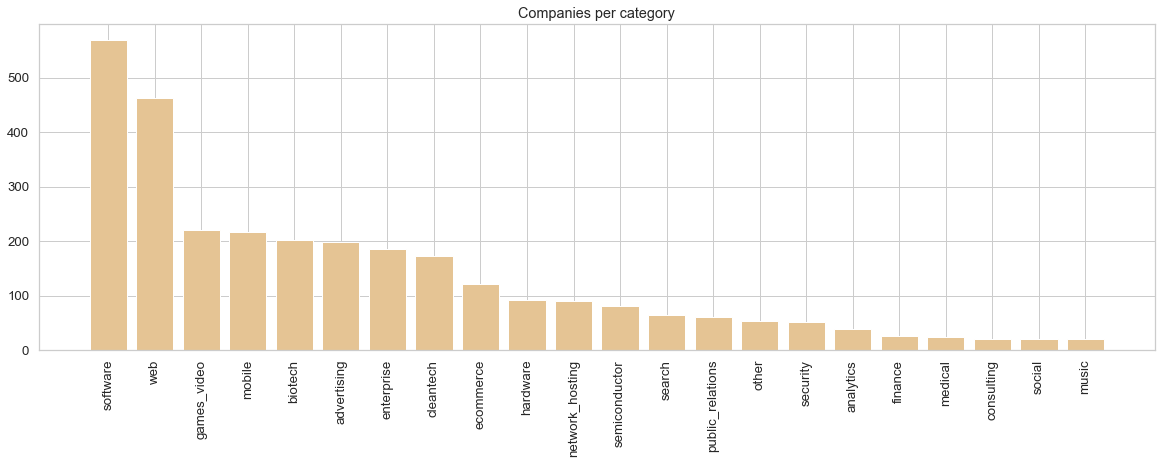

In [13]:
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).drop("All").index,height=pivot_categories.head(23).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.xticks(rotation=90)
plt.title("Companies per category")
plt.show()

### Predictors of IPO
- +: social, search, security
- -: hardware, public_relations, analytics, finance, medical, consulting

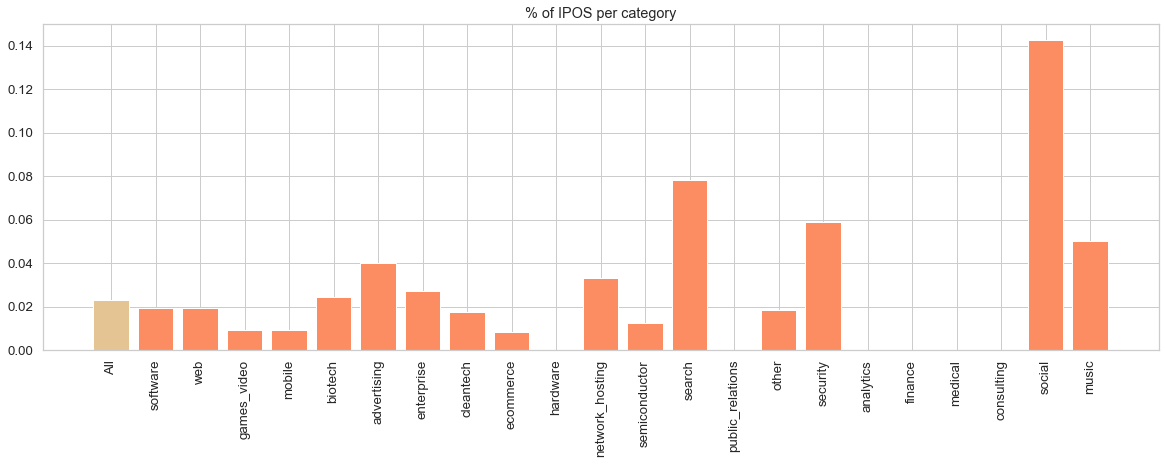

In [53]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(22*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).index,height=pivot_categories["ipo"].head(23), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per category")
plt.show()

### Predictors of Acquisition
- +: network hosting, web, mobile
- -: biotech, cleantech, medical

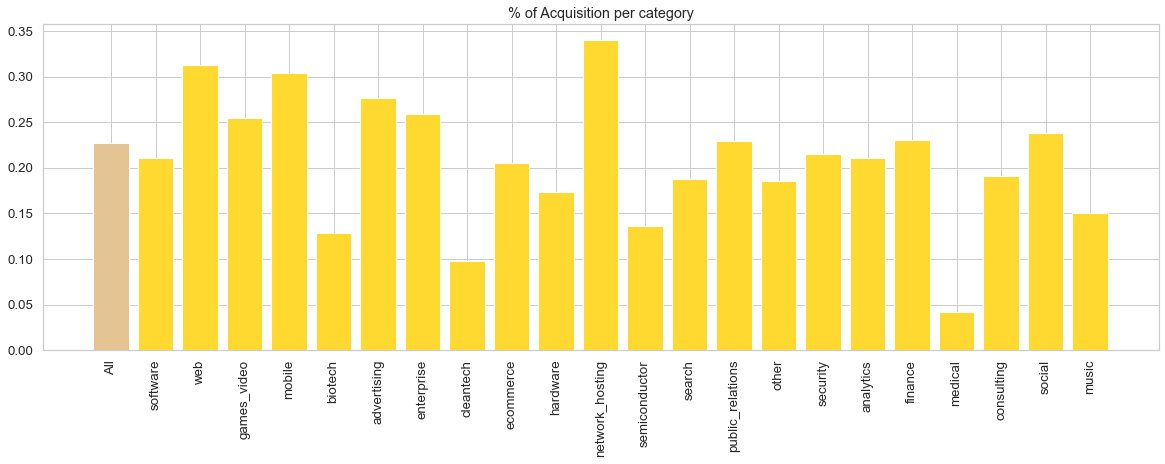

In [112]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(22*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).index,height=pivot_categories["acquisition"].head(23), color=colors)
plt.xticks(rotation=90)
plt.title("% of Acquisition per category")
plt.show()

### Predictors of no exit
- +: medical, biotech, cleantech
- -: network hosting, social

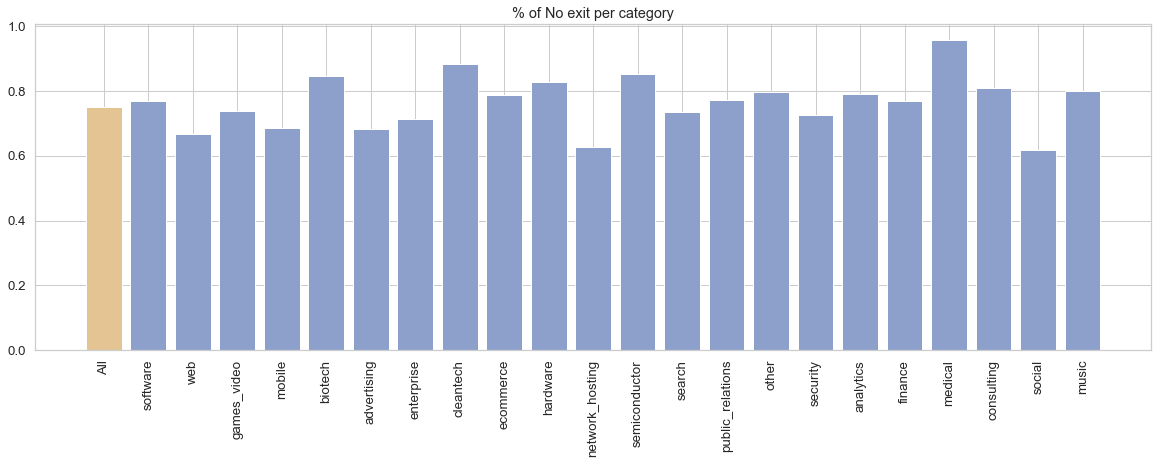

In [60]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(22*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).index,height=pivot_categories["no exit"].head(23), color=colors)
plt.xticks(rotation=90)
plt.title("% of No exit per category")
plt.show()

### Conclusion: to use as categorical features
- **for two classes** : medical, biotech, cleantech, network hosting, social
- **for 3 classes** : 2 classes + web, mobile, search, security, hardware, public_relations, finance, consulting, analytics

In [419]:
categories = companies.category_code.unique()

In [425]:
len(categories)

17

In [430]:
categories = ["web", "mobile", "biotech", "advertising", "enterprise", "cleantech", "hardware", "network_hosting", "semiconductor", "search",\
             "security", "public_relations", "finance", "consulting", "analytics", "social", "music"]

In [426]:
#Preprocessing

In [523]:
def clean_cat(x):
    if pd.isnull(x):
        return np.nan
    elif x in categories:
        return x
    else:
        return "other_category"

In [525]:
companies.category_code.map(clean_cat).value_counts()

other_category      1109
web                  463
mobile               217
biotech              203
advertising          199
enterprise           185
cleantech            173
hardware              92
network_hosting       91
semiconductor         81
search                64
public_relations      61
security              51
analytics             38
finance               26
social                21
consulting            21
music                 20
Name: category_code, dtype: int64

## Foundation Date

In [483]:
companies["founded_year"] = companies.founded_at.map(lambda x: np.nan if pd.isnull(x) else x).dt.strftime('%Y')

In [63]:
pivot_founded = pd.pivot_table(companies, values='id', index=["founded_year"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_founded = pivot_founded.fillna(0).sort_values(by = "All", ascending=False)
pivot_founded.acquisition = pivot_founded.acquisition/pivot_founded.All
pivot_founded.ipo = pivot_founded.ipo/pivot_founded.All
pivot_founded["no exit"] = pivot_founded["no exit"]/pivot_founded.All

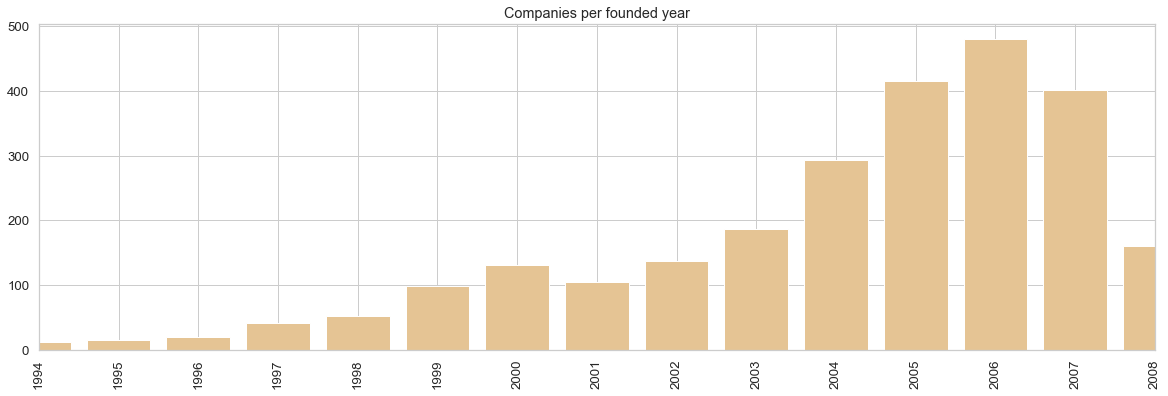

In [70]:
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.sort_index().drop("All").index,height=pivot_founded.sort_index().drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.xticks(rotation=90)
plt.xlim("1994", "2008")
plt.title("Companies per founded year")
plt.show()

### Predictors of IPO
- +: 1996, 1998, 1999
- -: 2002, 2007

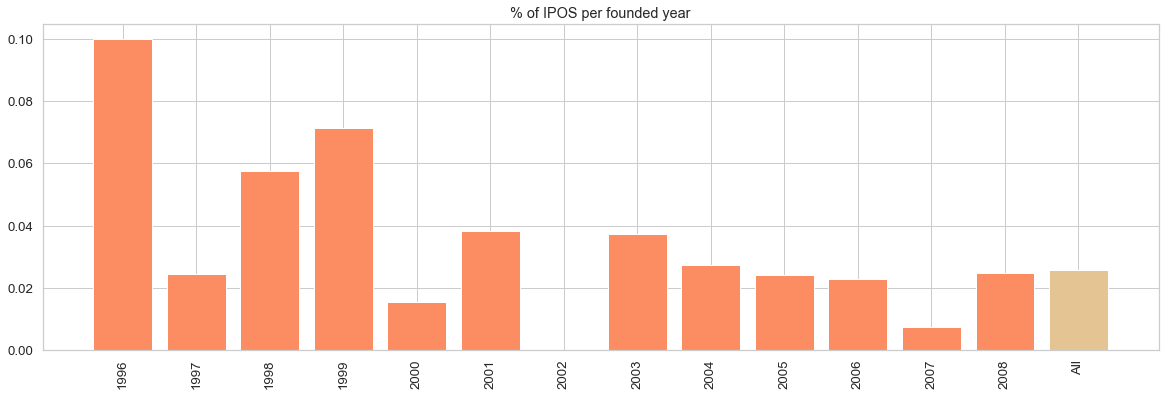

In [85]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.head(14).sort_index().index,height=pivot_founded["ipo"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per founded year")
plt.show()

### Predictors of Acquisition
- +: 1997, 2000
- -: 2007, 2008

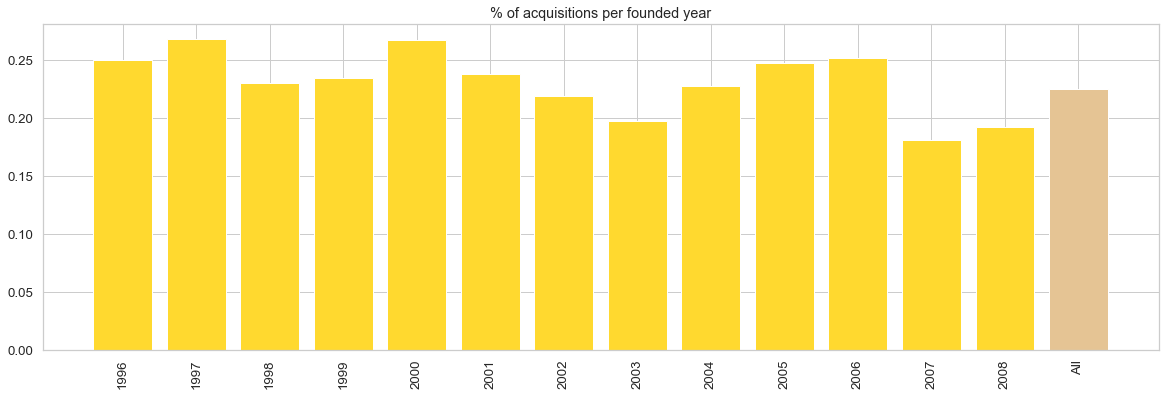

In [110]:
colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.head(14).sort_index().index,height=pivot_founded["acquisition"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per founded year")
plt.show()

### Predictors of No exit
- +: 1996
- -: 2002, 2007, 2008

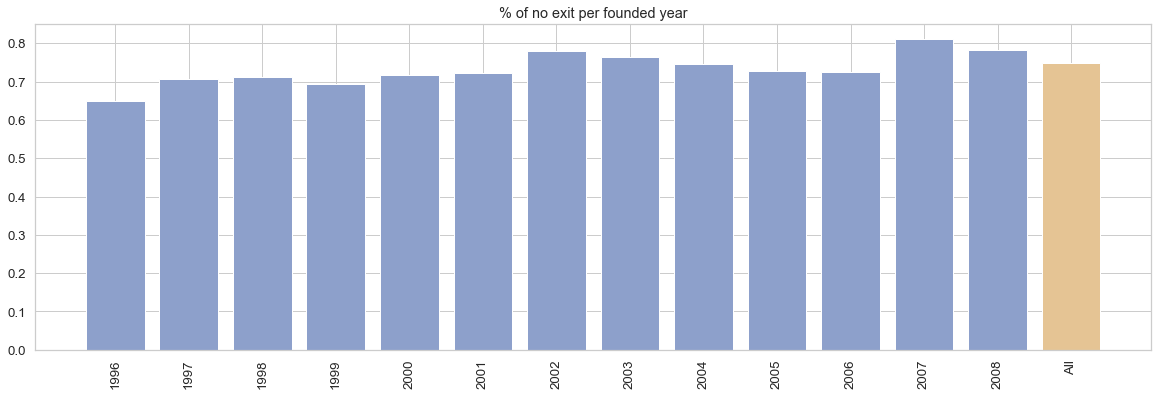

In [99]:
colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.head(14).sort_index().index,height=pivot_founded["no exit"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per founded year")
plt.show()

### Conclusion: to use as categorical features
- **for two classes** : 1996, 2002, 2007, 2008
- **for 3 classes** : 2 classes + 1997, 1998, 1999, 2000

In [504]:
import math
companies.founded_year[2]

'1978'

In [501]:
def date_new(x):
    if pd.isnull(x):
        return np.nan
    elif str(x) > "1995":
        return str(x)
    else:
        return "pre_1996"

In [506]:
companies.founded_year.map(date_new)

0            NaN
1           2007
2       pre_1996
3       pre_1996
4       pre_1996
          ...   
3236        2006
3237        2007
3238        2005
3239         NaN
3240        2013
Name: founded_year, Length: 3241, dtype: object

## Countries

In [1079]:
pivot_countries = pd.pivot_table(companies, values='id', index=["country_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_countries = pivot_countries.fillna(0).sort_values(by = "All", ascending=False)
pivot_countries.acquisition = pivot_countries.acquisition/pivot_countries.All
pivot_countries.ipo = pivot_countries.ipo/pivot_countries.All
pivot_countries["no exit"] = pivot_countries["no exit"]/pivot_countries.All

In [1080]:
pivot_countries

exit,acquisition,ipo,no exit,All
country_code,,,,
All,0.226748,0.023092,0.750160,3118
USA,0.252843,0.027559,0.719598,2286
GBR,0.174419,0.005814,0.819767,172
FRA,0.095238,0.007937,0.896825,126
CAN,0.320000,0.000000,0.680000,75
ISR,0.289855,0.014493,0.695652,69
DEU,0.161765,0.014706,0.823529,68
CHN,0.044444,0.022222,0.933333,45
SWE,0.096774,0.000000,0.903226,31


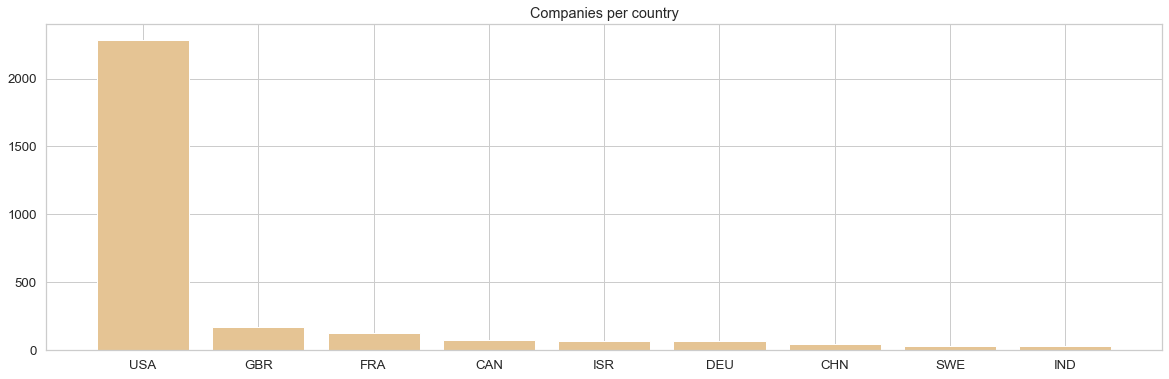

In [98]:
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).drop("All").index,height=pivot_countries.head(10).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per country")
plt.show()

### Predictors of IPO
- +: USA
- -: CAN, SWE, IND

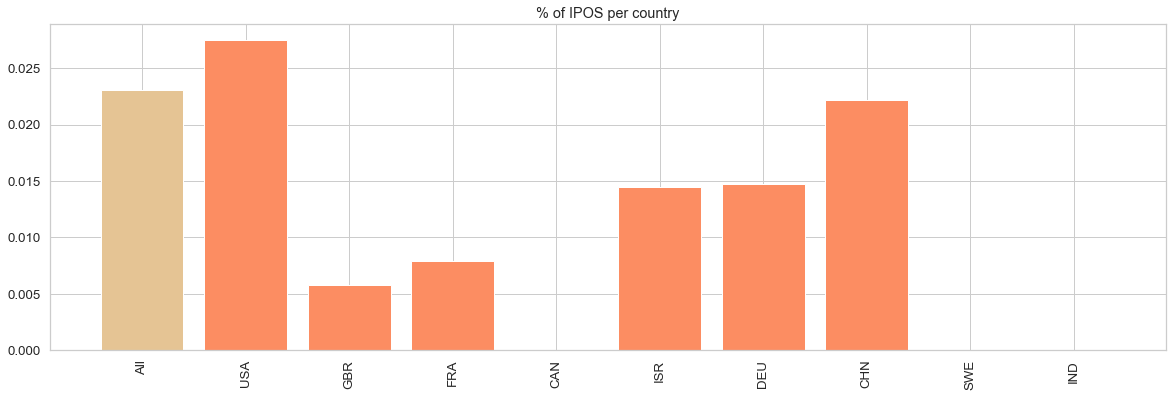

In [101]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(9*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).index,height=pivot_countries["ipo"].head(10), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per country")
plt.show()

### Predictors of Acquisition
- +: CAN, ISR
- -: FRA, CHN, IND, SWE

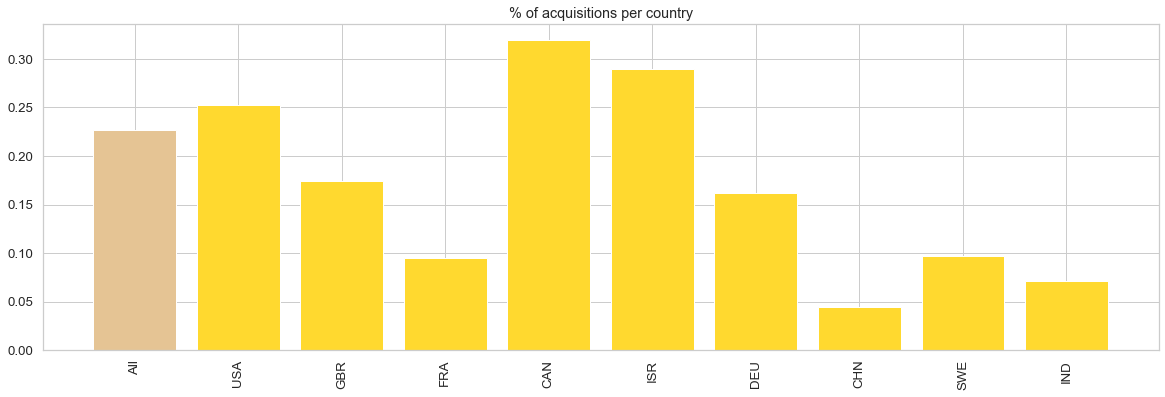

In [123]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(9*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).index,height=pivot_countries["acquisition"].head(10), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per country")
plt.show()

### Predictors of no exit
- +: FRA, CHN, SWE, IND
- -: CAN, ISR

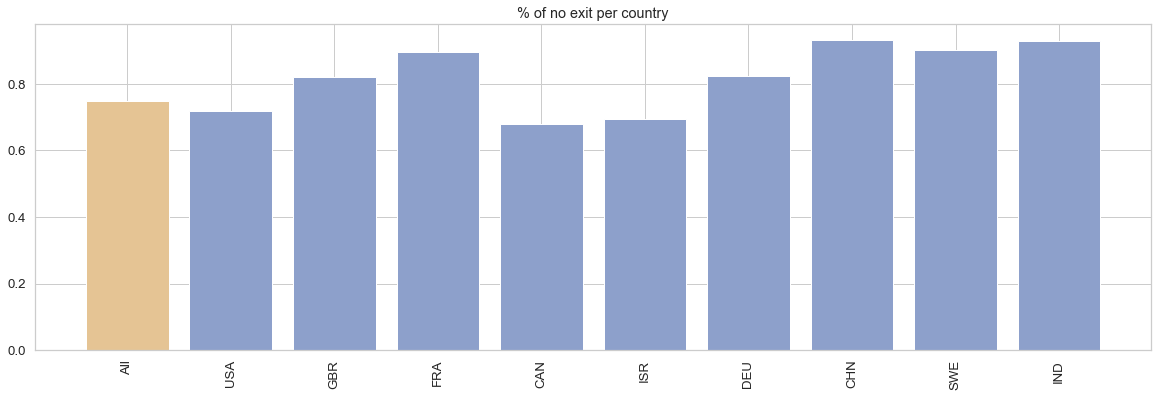

In [122]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(9*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).index,height=pivot_countries["no exit"].head(10), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per country")
plt.show()

In [1144]:
def USA(x):
    if pd.isnull(x):
        return np.nan
    elif x =="USA":
        return x
    else:
        return "other_country"

In [1146]:
companies["USA"]= companies.country_code.map(USA)

In [1147]:
pivot_school = pd.pivot_table(companies, values='id', index=["USA"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_school = pivot_school.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school[0] = pivot_school[0]/pivot_school.All
pivot_school[1] = pivot_school[1]/pivot_school.All

In [1148]:
pivot_school

target,0,1,All
USA,,,
USA,0.719598,0.280402,2286
other_country,0.834135,0.165865,832
All,0.750160,0.249840,3118


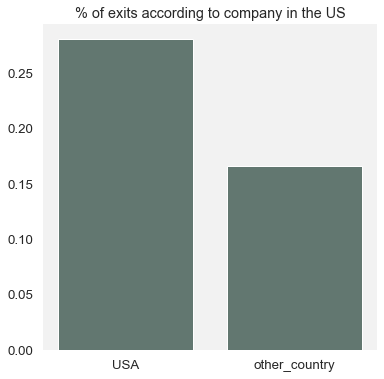

In [1150]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_school.drop("All").head(10).index.astype(str),height=pivot_school.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to company in the US")
plt.grid(False)
plt.show()

In [1155]:
def Cal(x):
    if pd.isnull(x):
        return np.nan
    elif x =="CA":
        return x
    else:
        return "other_state"

In [1156]:
companies["Cal"]= companies.state_code.map(Cal)

In [1157]:
pivot_school = pd.pivot_table(companies, values='id', index=["Cal"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_school = pivot_school.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school[0] = pivot_school[0]/pivot_school.All
pivot_school[1] = pivot_school[1]/pivot_school.All

In [1158]:
pivot_school

target,0,1,All
Cal,,,
CA,0.691835,0.308165,1139
other_state,0.750454,0.249546,1102
All,0.720660,0.279340,2241


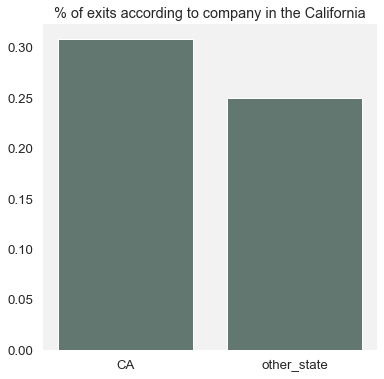

In [1159]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_school.drop("All").head(10).index.astype(str),height=pivot_school.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to company in the California")
plt.grid(False)
plt.show()

### Conclusion: to use as categorical features
FRA, CHN, SWE, IND, CAN, ISR, USA

In [507]:
countries = ["FRA","USA", "GBR", "CAN", "ISR", "DEU", "CHN", "SWE", "IND"]

In [526]:
def clean_country(x):
    if pd.isnull(x):
        return np.nan
    elif x in countries:
        return x
    else:
        return "other_country"

In [529]:
companies.country_code.map(clean_country).value_counts()

USA              2286
other_country     218
GBR               172
FRA               126
CAN                75
ISR                69
DEU                68
CHN                45
SWE                31
IND                28
Name: country_code, dtype: int64

## State Code

In [114]:
pivot_states = pd.pivot_table(companies, values='id', index=["state_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_states = pivot_states.fillna(0).sort_values(by = "All", ascending=False)
pivot_states.acquisition = pivot_states.acquisition/pivot_states.All
pivot_states.ipo = pivot_states.ipo/pivot_states.All
pivot_states["no exit"] = pivot_states["no exit"]/pivot_states.All

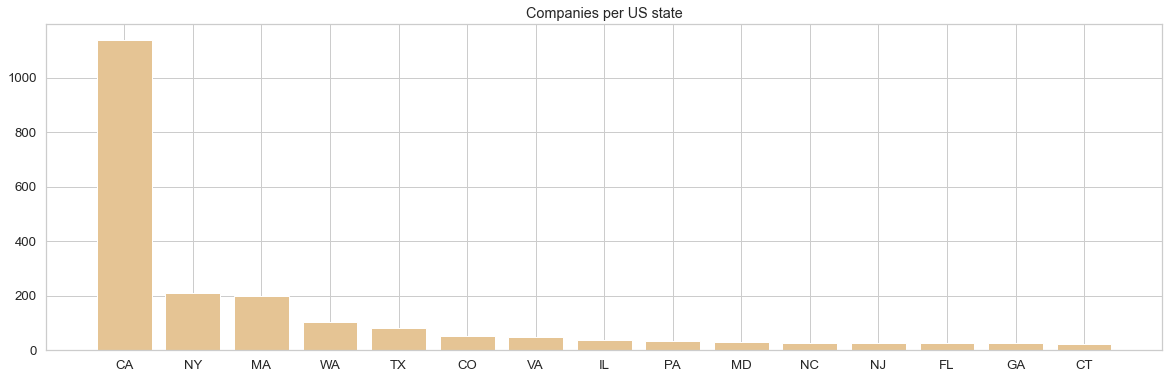

In [116]:
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(16).drop("All").index,height=pivot_states.head(16).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per US state")
plt.show()

### Predictors of IPO
- +: IL, PA
- -: CO, NJ, FL

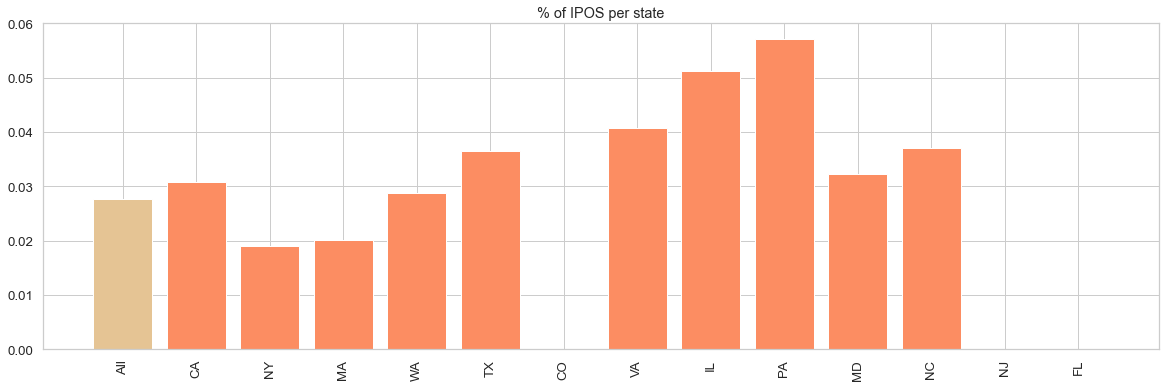

In [124]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["ipo"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per state")
plt.show()

### Predictors of Acquisition
- +: CA, WA
- -: PA, FL

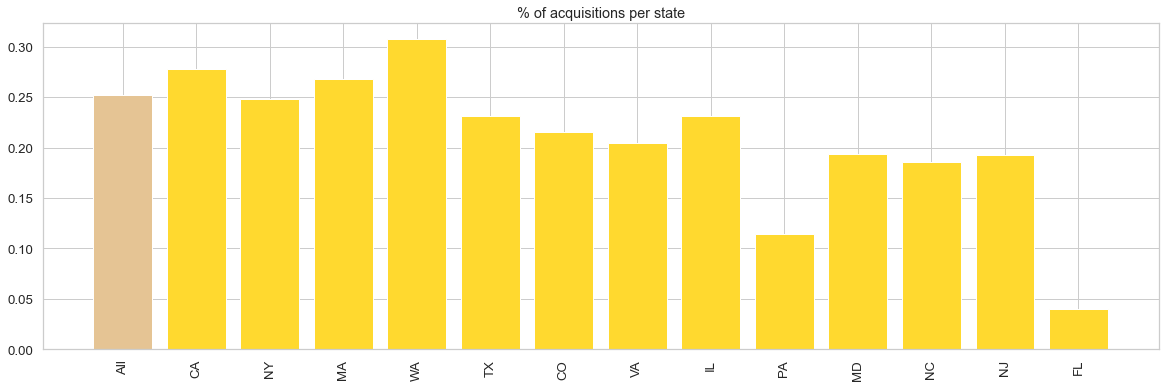

In [125]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["acquisition"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per state")
plt.show()

### Predictors of no exit
- +: PA, FL
- -: WA, CA

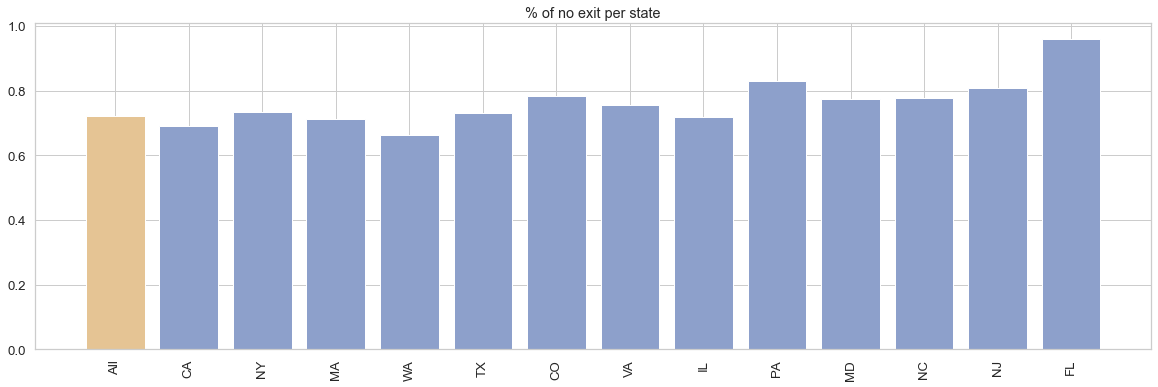

In [127]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["no exit"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per state")
plt.show()

### Conclusion: to use as categorical features
- **2 classes**: PA, FL, WA, CA
- **3 classes**: 2 classes + IL, CO, NJ, FL

In [510]:
companies.state_code.unique()

array(['CA', 'ID', 'WA', nan, 'TX', 'NY', 'PA', 'MA', 'CO', 'VA', 'IL',
       'OR', 'NV', 'UT', 'WI', 'CT', 'DC', 'NC', 'ME', 'MD', 'KS', 'GA',
       'NJ', 'TN', 'AZ', 'MO', 'IN', 'MI', 'OH', 'LA', 'MN', 'HI', 'NH',
       'FL', 'VT', 'DE', 'KY', 'MT', 'MS', 'WV', 'RI', 'AL', 'NM', 'NE',
       'SC', 'ND', 'AK'], dtype=object)

In [512]:
states = ['CA', 'NY', "MA", "WA", "TX", "CO", "VA", "IL", "PA", "MD", "NC", "NJ", "FL"]

In [530]:
def clean_state(x):
    if pd.isnull(x):
        return np.nan
    elif x in states:
        return x
    else:
        return "other_state"

In [532]:
companies.state_code.map(clean_state).value_counts()

other_state    1225
CA             1139
NY              210
MA              198
WA              104
TX               82
CO               51
VA               49
IL               39
PA               35
MD               31
NC               27
NJ               26
FL               25
Name: state_code, dtype: int64

# Founders

In [152]:
companies.founder_count = companies.founder_count.map(lambda x: np.nan if x=="nan" else round(float(x)))

In [514]:
pivot_founders = pd.pivot_table(companies, values='id', index=["founder_count"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_founders = pivot_founders.fillna(0).sort_values(by = "All", ascending=False)
pivot_founders.acquisition = pivot_founders.acquisition/pivot_founders.All
pivot_founders.ipo = pivot_founders.ipo/pivot_founders.All
pivot_founders["no exit"] = pivot_founders["no exit"]/pivot_founders.All

In [515]:
pivot_founders

exit,acquisition,ipo,no exit,All
founder_count,,,,
All,0.269375,0.036875,0.693750,1600
1.0,0.247482,0.028777,0.723741,695
2.0,0.279857,0.032086,0.688057,561
3.0,0.276596,0.059574,0.663830,235
4.0,0.346667,0.000000,0.653333,75
5.0,0.227273,0.227273,0.545455,22
6.0,0.555556,0.000000,0.444444,9
7.0,0.500000,0.500000,0.000000,2
8.0,0.000000,1.000000,0.000000,1


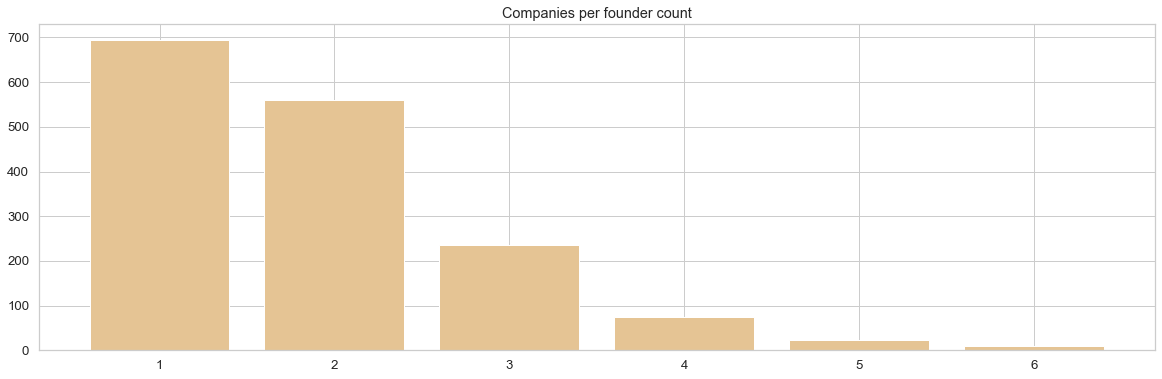

In [219]:
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).drop("All").index,height=pivot_founders.head(7).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per founder count")
plt.show()

### Predictors of IPO
> seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

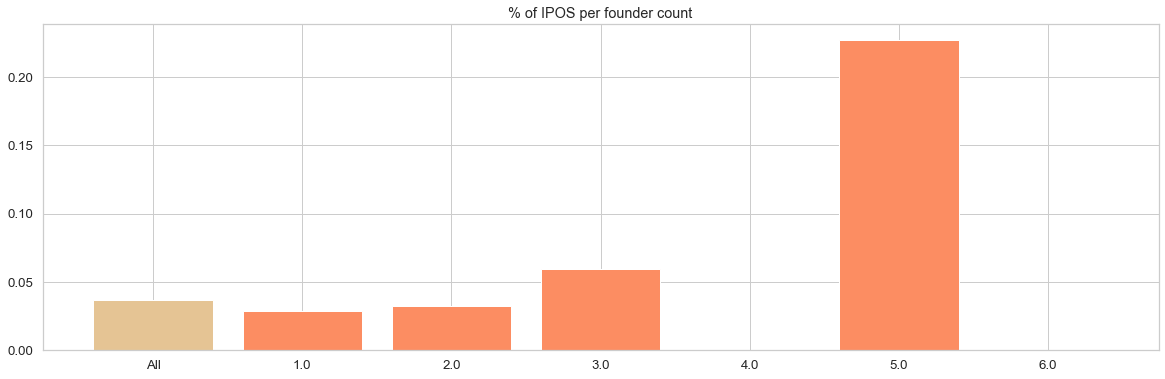

In [216]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).index.astype(str),height=pivot_founders.head(7)["ipo"], color=colors)
plt.title("% of IPOS per founder count")
plt.show()

### Predictors of Acquisition
> again seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

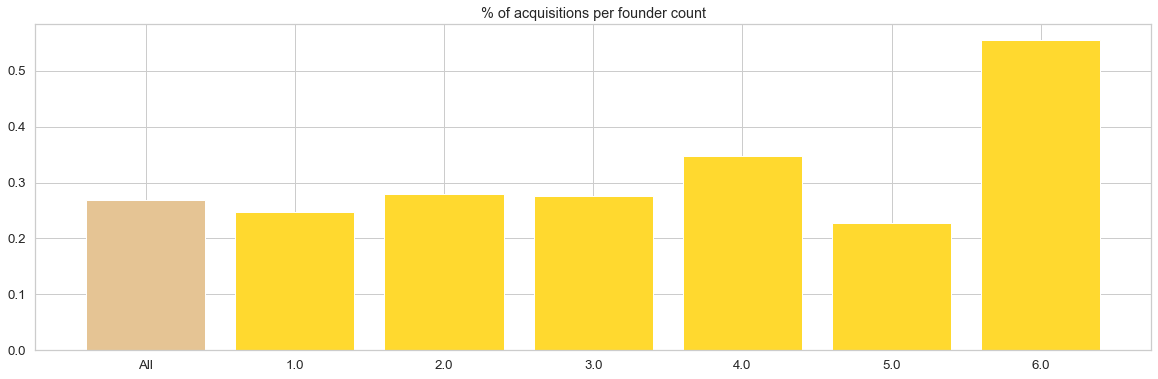

In [224]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).index.astype(str),height=pivot_founders.head(7)["acquisition"], color=colors)
plt.title("% of acquisitions per founder count")
plt.show()

### Predictors of no exit
Clear downward trend as number of founders increase !

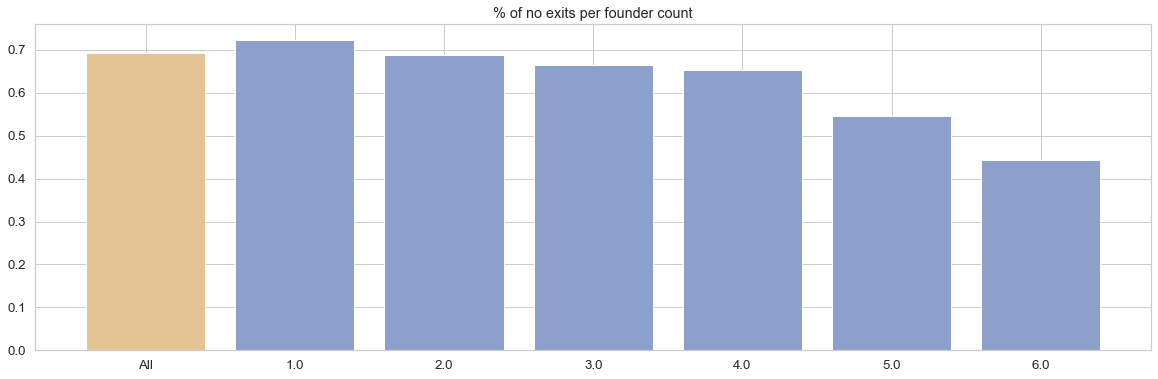

In [226]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).index.astype(str),height=pivot_founders.head(7)["no exit"], color=colors)
plt.title("% of no exits per founder count")
plt.show()

In [519]:
companies.founder_count.value_counts()

1.0    695
2.0    561
3.0    235
4.0     75
5.0     22
6.0      9
7.0      2
8.0      1
Name: founder_count, dtype: int64

In [550]:
def clean_founder(x):
    if pd.isnull(x):
        return np.nan
    elif x <= 3:
        return int(x)
    else:
        return 4

In [551]:
companies.founder_count.map(clean_founder).value_counts()

1.0    695
2.0    561
3.0    235
4.0    109
Name: founder_count, dtype: int64

### Conclusion: good feature!

## Female founder count

In [209]:
pivot_fem_founders = pd.pivot_table(companies, values='id', index=["n_female_founders"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_fem_founders = pivot_fem_founders.fillna(0).sort_values(by = "All", ascending=False)
pivot_fem_founders.acquisition = pivot_fem_founders.acquisition/pivot_fem_founders.All
pivot_fem_founders.ipo = pivot_fem_founders.ipo/pivot_fem_founders.All
pivot_fem_founders["no exit"] = pivot_fem_founders["no exit"]/pivot_fem_founders.All

In [210]:
pivot_fem_founders

exit,acquisition,ipo,no exit,All
n_female_founders,,,,
All,0.270218,0.036585,0.693196,1558
0.0,0.277624,0.037293,0.685083,1448
1.0,0.178218,0.029703,0.792079,101
2.0,0.142857,0.000000,0.857143,7
3.0,0.000000,0.000000,1.000000,1
5.0,0.000000,0.000000,1.000000,1


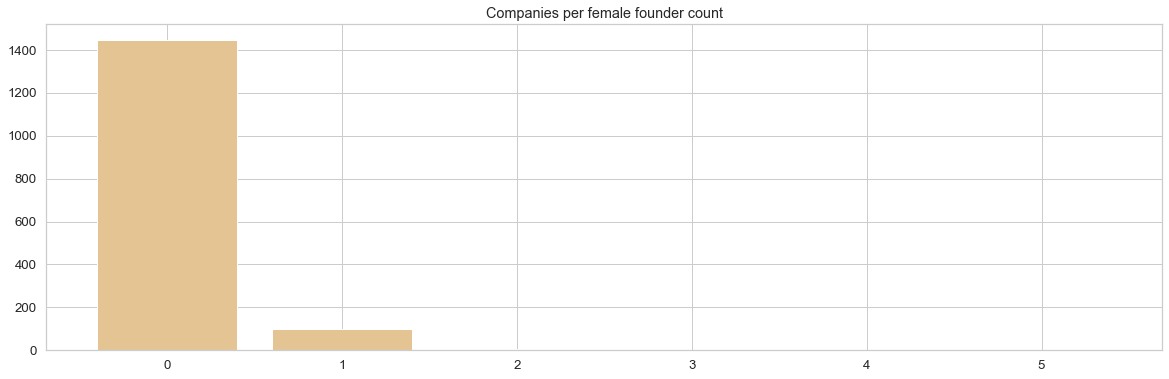

In [227]:
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).drop("All").index,height=pivot_fem_founders.head(7).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per female founder count")
plt.show()

### Predictors of IPO
> seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

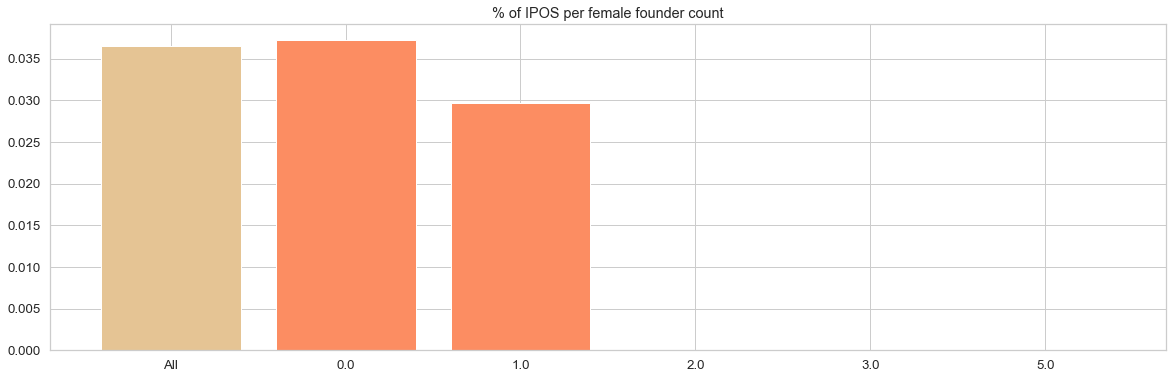

In [228]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).index.astype(str),height=pivot_fem_founders.head(7)["ipo"], color=colors)
plt.title("% of IPOS per female founder count")
plt.show()

### Predictors of Acquisition
> again seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

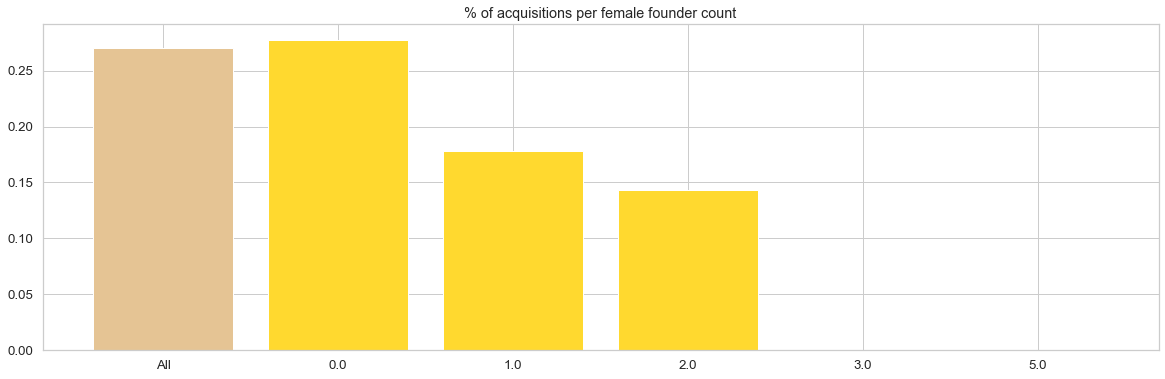

In [229]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).index.astype(str),height=pivot_fem_founders.head(7)["acquisition"], color=colors)
plt.title("% of acquisitions per female founder count")
plt.show()

### Predictors of no exit
Clear upward trend as number of female founders increase !

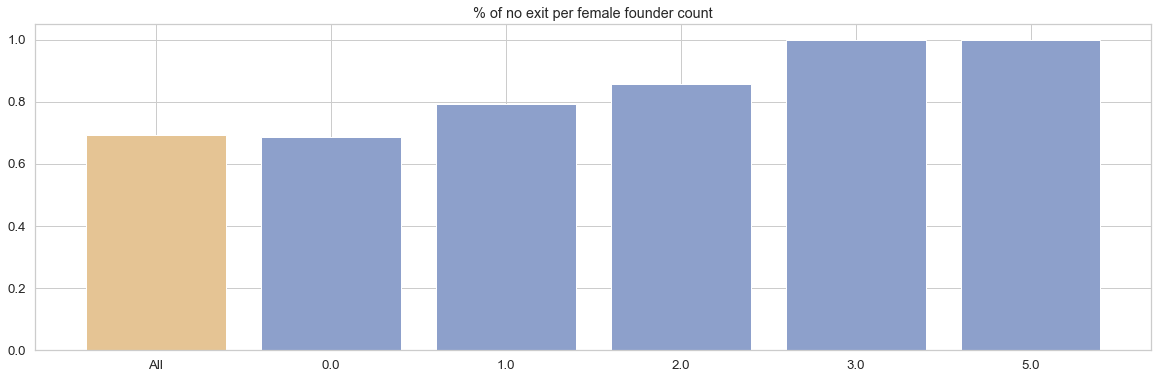

In [231]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).index.astype(str),height=pivot_fem_founders.head(7)["no exit"], color=colors)
plt.title("% of no exit per female founder count")
plt.show()

### Conclusion: good feature.. unfortunately

## Female ratio

In [541]:
def clean_female(x):
    if pd.isnull(x):
        return np.nan
    elif x == 0:
        return 0
    else:
        return 1

In [542]:

companies["female_ratio_cl"] = companies["female_ratio"].map(clean_female)

In [1087]:
pivot_fem_ratio = pd.pivot_table(companies, values='id', index=["female_ratio_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_fem_ratio.acquisition = pivot_fem_ratio.acquisition/pivot_fem_ratio.All
pivot_fem_ratio.ipo = pivot_fem_ratio.ipo/pivot_fem_ratio.All
pivot_fem_ratio["no exit"] = pivot_fem_ratio["no exit"]/pivot_fem_ratio.All

In [1088]:
pivot_fem_ratio

exit,acquisition,ipo,no exit,All
female_ratio_cl,,,,
0.0,0.277624,0.037293,0.685083,1448
1.0,0.172727,0.027273,0.800000,110
All,0.270218,0.036585,0.693196,1558


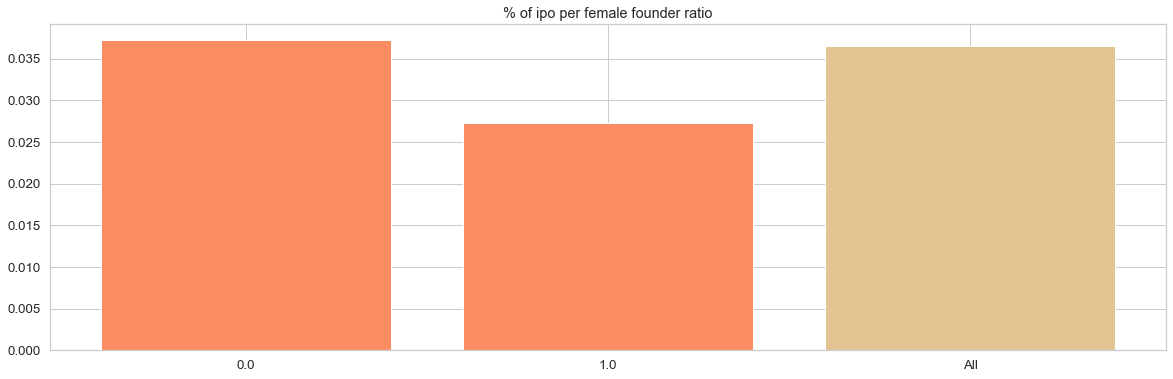

In [1083]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["ipo"], color=colors)
plt.title("% of ipo per female founder ratio")
plt.show()

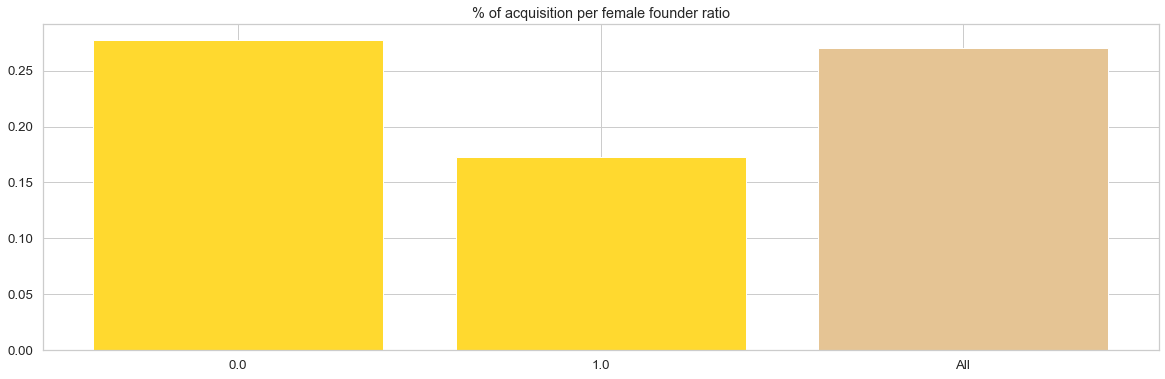

In [546]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per female founder ratio")
plt.show()

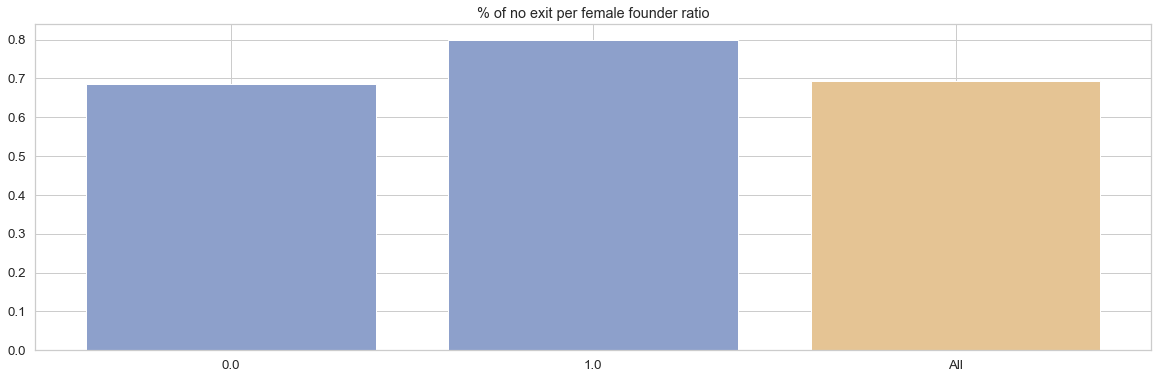

In [547]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["no exit"], color=colors)
plt.title("% of no exit per female founder ratio")
plt.show()

In [ ]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["no exit"], color=colors)
plt.title("% of no exit per female founder ratio")
plt.show()

In [538]:
def clean_female(x):
    if pd.isnull(x):
        return np.nan
    elif x == 0:
        return 0
    else:
        return 1

In [540]:
companies["female_ratio"].map(clean_female).value_counts()

0.0    1448
1.0     110
Name: female_ratio, dtype: int64

In [1089]:
pivot_fem_ratio = pd.pivot_table(companies, values='id', index=["female_ratio_cl"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_fem_ratio[0] = pivot_fem_ratio[0]/pivot_fem_ratio.All
pivot_fem_ratio[1] = pivot_fem_ratio[1]/pivot_fem_ratio.All

#pivot_fem_ratio.ipo = pivot_fem_ratio.ipo/pivot_fem_ratio.All
#pivot_fem_ratio["no exit"] = pivot_fem_ratio["no exit"]/pivot_fem_ratio.All

In [1090]:
pivot_fem_ratio

target,0,1,All
female_ratio_cl,,,
0.0,0.685083,0.314917,1448
1.0,0.800000,0.200000,110
All,0.693196,0.306804,1558


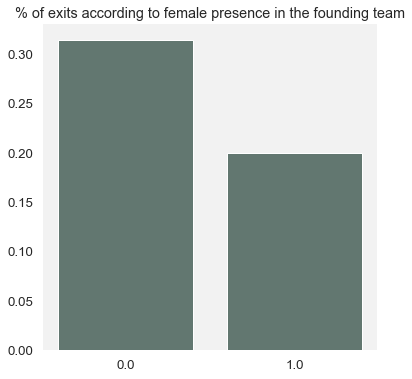

In [1120]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_fem_ratio.drop("All").head(10).index.astype(str),height=pivot_fem_ratio.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to female presence in the founding team")
plt.grid(False)
plt.show()

# Schools

In [553]:
def clean_school(x):
    if pd.isnull(x):
        return np.nan
    elif x >0:
        return 1
    else:
        return 0

In [1127]:
companies["top_school"] = (companies["top_5_bool"] + companies["top_20_bool"]).map(clean_school)

In [571]:
companies.top_school.value_counts()

0.0    1199
1.0     401
Name: top_school, dtype: int64

In [572]:
pivot_school = pd.pivot_table(companies, values='id', index=["top_5_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_school = pivot_school.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school.acquisition = pivot_school.acquisition/pivot_school.All
pivot_school.ipo = pivot_school.ipo/pivot_school.All
pivot_school["no exit"] = pivot_school["no exit"]/pivot_school.All

In [573]:
pivot_school

exit,acquisition,ipo,no exit,All
top_5_bool,,,,
0.0,0.255656,0.030920,0.713424,1326
1.0,0.335766,0.065693,0.598540,274
All,0.269375,0.036875,0.693750,1600


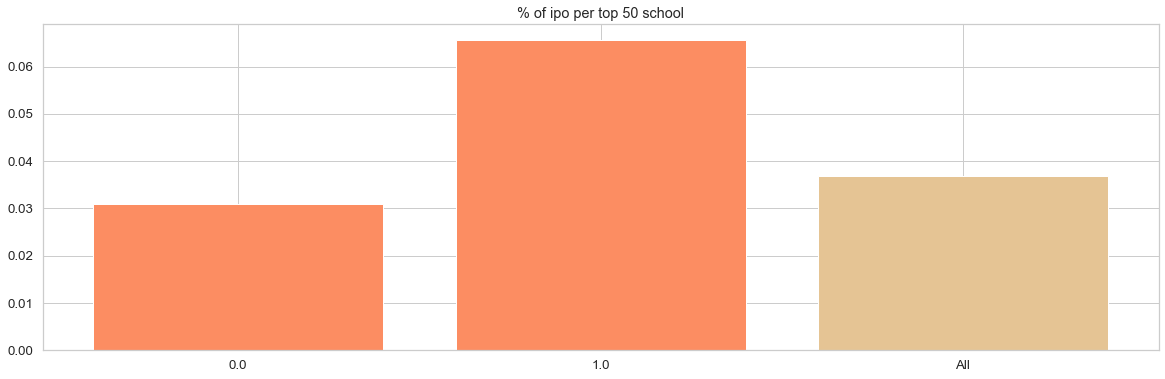

In [574]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_school.head(10).index.astype(str),height=pivot_school.head(10)["ipo"], color=colors)
plt.title("% of ipo per top 50 school")
plt.show()

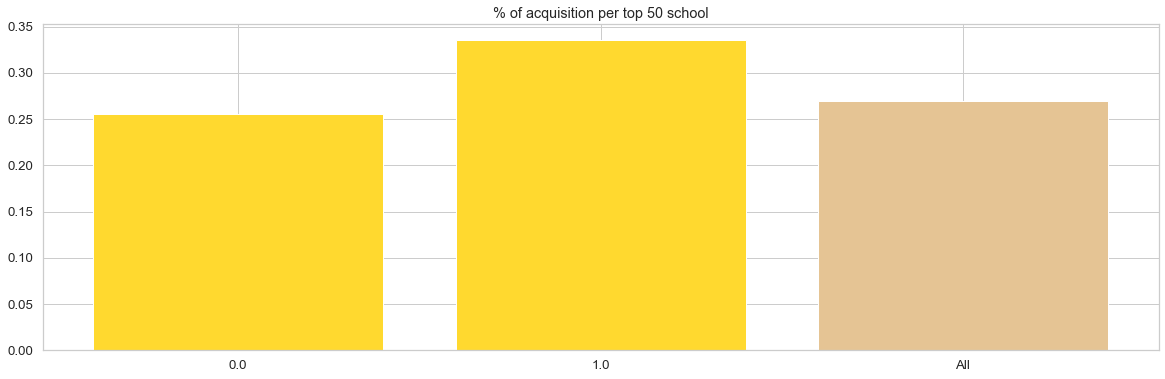

In [575]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_school.head(10).index.astype(str),height=pivot_school.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per top 50 school")
plt.show()

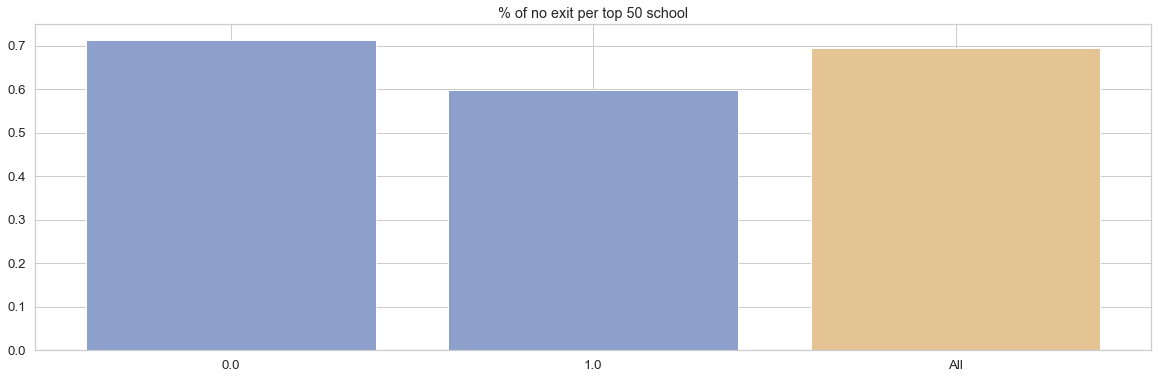

In [576]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_school.head(10).index.astype(str),height=pivot_school.head(10)["no exit"], color=colors)
plt.title("% of no exit per top 50 school")
plt.show()

In [1128]:
pivot_school = pd.pivot_table(companies, values='id', index=["top_school"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school[0] = pivot_school[0]/pivot_school.All
pivot_school[1] = pivot_school[1]/pivot_school.All

In [1129]:
pivot_school

target,0,1,All
top_school,,,
0.0,0.718098,0.281902,1199
1.0,0.620948,0.379052,401
All,0.693750,0.306250,1600


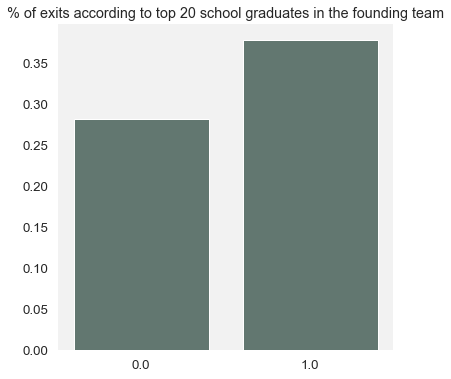

In [1131]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_school.drop("All").head(10).index.astype(str),height=pivot_school.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to top 20 school graduates in the founding team")
plt.grid(False)
plt.show()

## Computer Science

In [558]:
pivot_study = pd.pivot_table(companies, values='id', index=["cs_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_study = pivot_study.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_study.acquisition = pivot_study.acquisition/pivot_study.All
pivot_study.ipo = pivot_study.ipo/pivot_study.All
pivot_study["no exit"] = pivot_study["no exit"]/pivot_study.All

In [559]:
pivot_study

exit,acquisition,ipo,no exit,All
cs_bool,,,,
0.0,0.253968,0.032540,0.713492,1260
1.0,0.326471,0.052941,0.620588,340
All,0.269375,0.036875,0.693750,1600


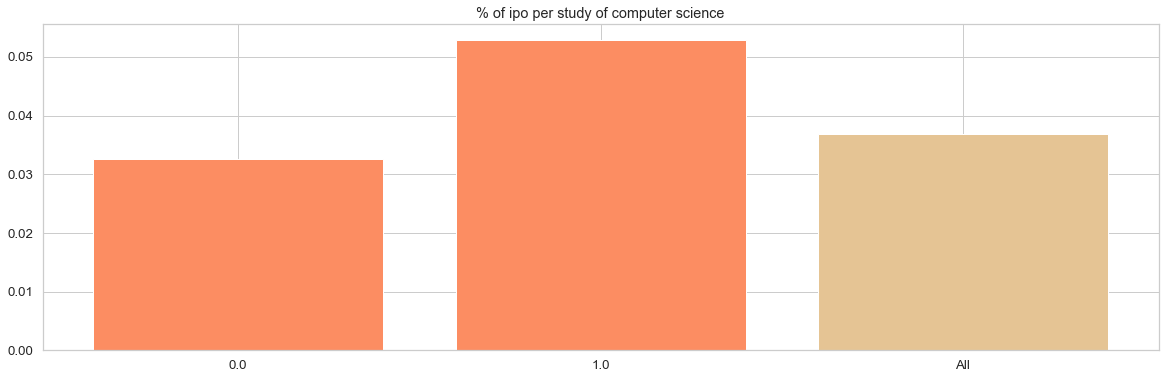

In [373]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["ipo"], color=colors)
plt.title("% of ipo per study of computer science")
plt.show()

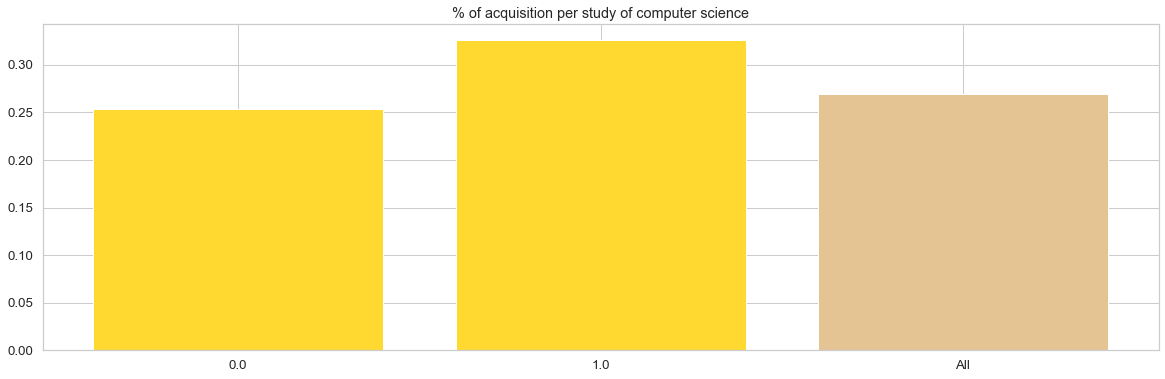

In [374]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per study of computer science")
plt.show()

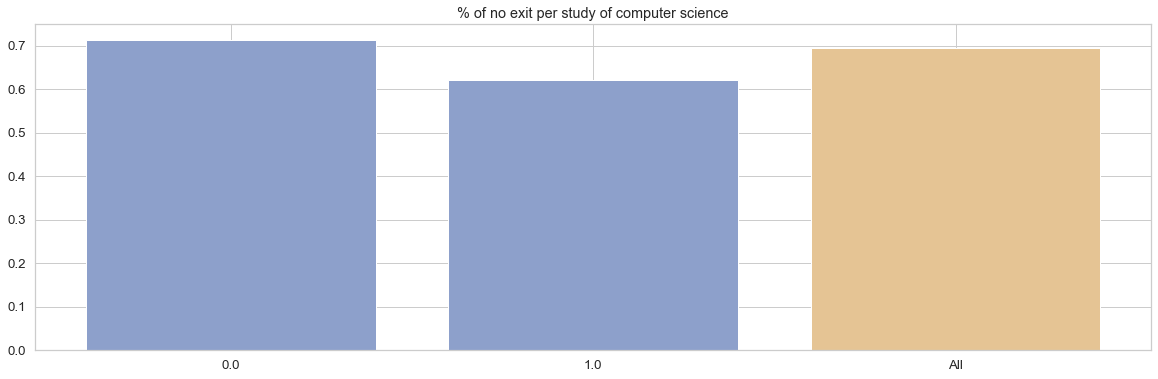

In [375]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["no exit"], color=colors)
plt.title("% of no exit per study of computer science")
plt.show()

In [1132]:
pivot_school = pd.pivot_table(companies, values='id', index=["MBA_bool"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school[0] = pivot_school[0]/pivot_school.All
pivot_school[1] = pivot_school[1]/pivot_school.All

In [1133]:
pivot_school

target,0,1,All
MBA_bool,,,
0.0,0.708333,0.291667,1320
1.0,0.625000,0.375000,280
All,0.693750,0.306250,1600


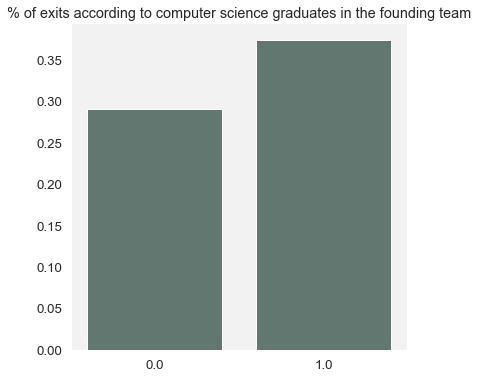

In [1135]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_school.drop("All").head(10).index.astype(str),height=pivot_school.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to computer science graduates in the founding team")
plt.grid(False)
plt.show()

## MBA

In [380]:
pivot_study = pd.pivot_table(companies, values='id', index=["MBA_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_study = pivot_study.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_study.acquisition = pivot_study.acquisition/pivot_study.All
pivot_study.ipo = pivot_study.ipo/pivot_study.All
pivot_study["no exit"] = pivot_study["no exit"]/pivot_study.All

In [385]:
pivot_study

exit,acquisition,ipo,no exit,All
MBA_bool,,,,
0.0,0.259848,0.031818,0.708333,1320
1.0,0.314286,0.060714,0.625000,280
All,0.269375,0.036875,0.693750,1600


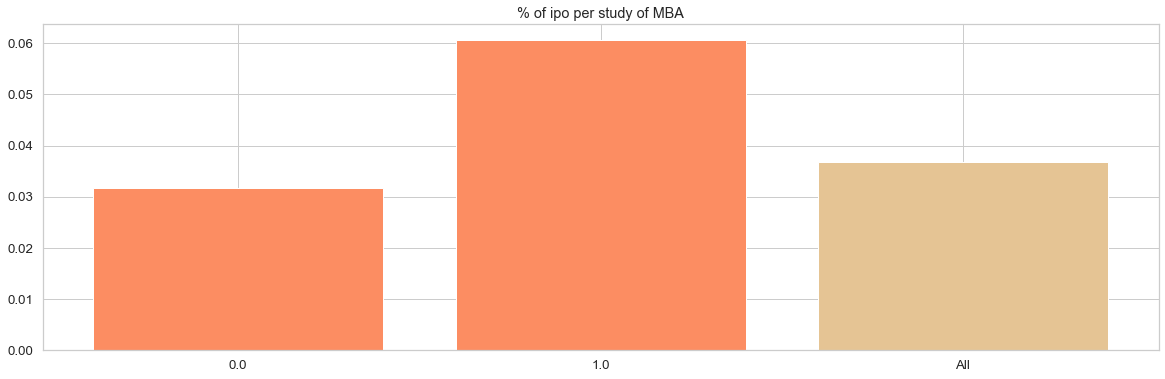

In [381]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["ipo"], color=colors)
plt.title("% of ipo per study of MBA")
plt.show()

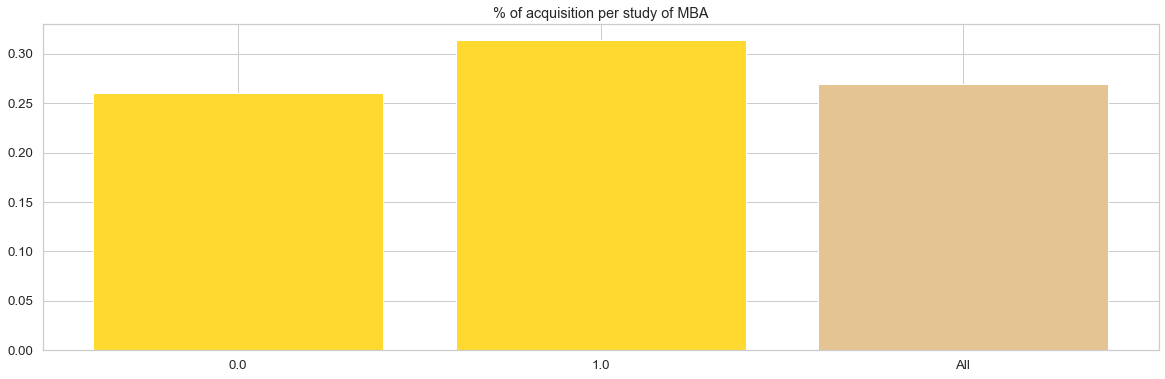

In [382]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per study of MBA")
plt.show()

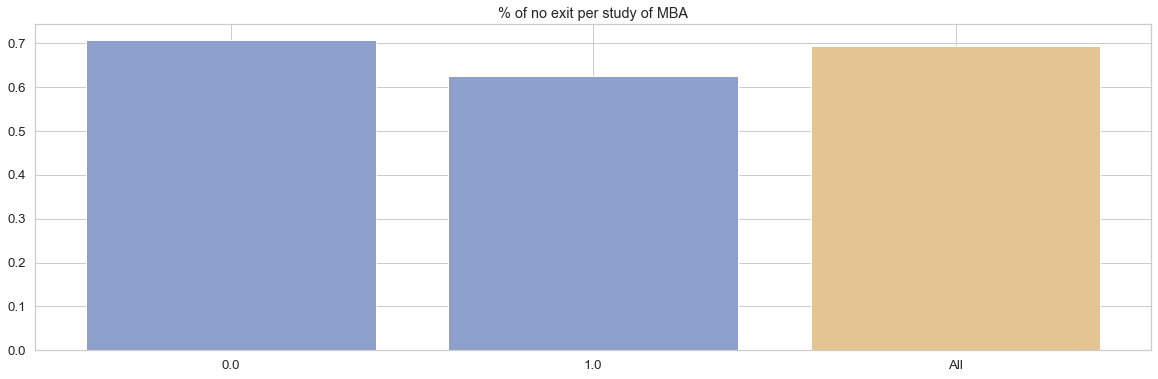

In [384]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["no exit"], color=colors)
plt.title("% of no exit per study of MBA")
plt.show()

In [1136]:
pivot_school = pd.pivot_table(companies, values='id', index=["cs_bool"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school[0] = pivot_school[0]/pivot_school.All
pivot_school[1] = pivot_school[1]/pivot_school.All

In [1137]:
pivot_school

target,0,1,All
cs_bool,,,
0.0,0.713492,0.286508,1260
1.0,0.620588,0.379412,340
All,0.693750,0.306250,1600


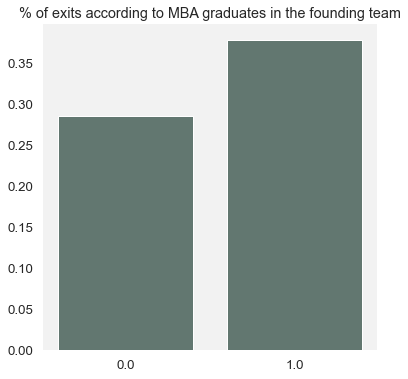

In [1139]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_school.drop("All").head(10).index.astype(str),height=pivot_school.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to MBA graduates in the founding team")
plt.grid(False)
plt.show()

## PhD

In [969]:
pivot_study = pd.pivot_table(companies, values='id', index=["phd_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_study = pivot_study.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_study.acquisition = pivot_study.acquisition/pivot_study.All
pivot_study.ipo = pivot_study.ipo/pivot_study.All
pivot_study["no exit"] = pivot_study["no exit"]/pivot_study.All

In [970]:
pivot_study

exit,acquisition,ipo,no exit,All
phd_bool,,,,
0.0,0.277473,0.035027,0.687500,1456
1.0,0.187500,0.055556,0.756944,144
All,0.269375,0.036875,0.693750,1600


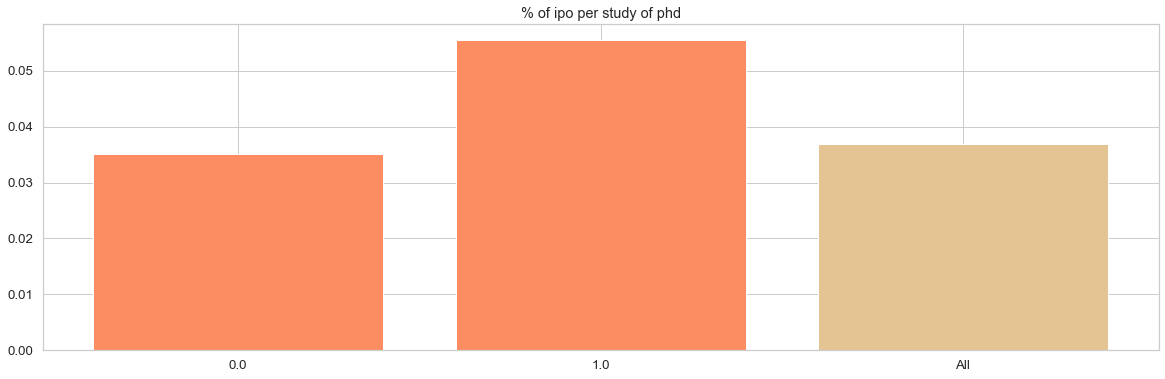

In [971]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["ipo"], color=colors)
plt.title("% of ipo per study of phd")
plt.show()

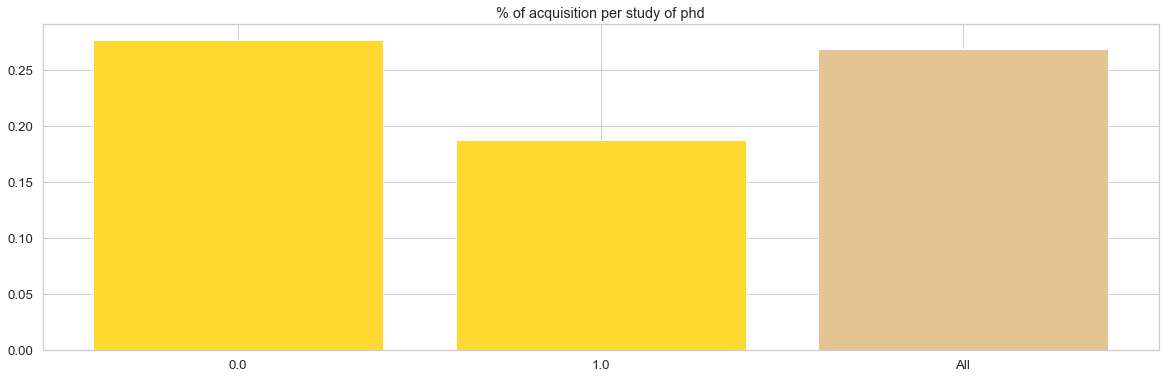

In [972]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per study of phd")
plt.show()

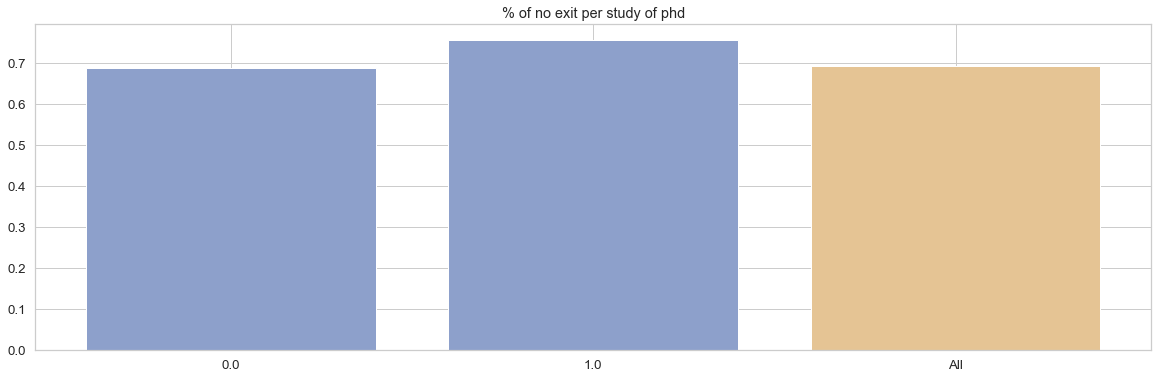

In [973]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["no exit"], color=colors)
plt.title("% of no exit per study of phd")
plt.show()

In [1141]:
pivot_school = pd.pivot_table(companies, values='id', index=["phd_bool"],
                    columns=['target'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school[0] = pivot_school[0]/pivot_school.All
pivot_school[1] = pivot_school[1]/pivot_school.All

In [1142]:
pivot_school

target,0,1,All
phd_bool,,,
0.0,0.687500,0.312500,1456
1.0,0.756944,0.243056,144
All,0.693750,0.306250,1600


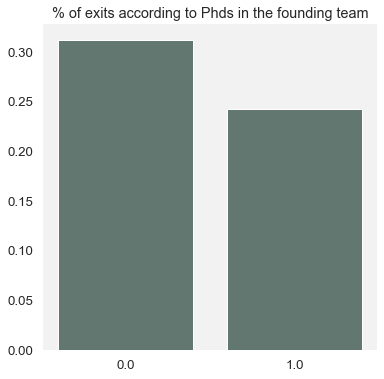

In [1143]:
colors = 2*["#627770"]
colors.extend(["#627770"])
plt.figure(figsize=(6,6))
ax = plt.gca()
for spine in plt.gca().spines.values():
      spine.set_visible(False)
ax.set_facecolor('#F2F2F2')
plt.bar(pivot_school.drop("All").head(10).index.astype(str),height=pivot_school.drop("All").head(10)[1], color=colors)
plt.title("% of exits according to Phds in the founding team")
plt.grid(False)
plt.show()

## Degree Count

In [1039]:
def clean_study(x):
    if pd.isnull(x):
        return np.nan
    if x>=3:
        return 3
    else:
        return round(x)

In [1040]:
companies["degree_count_cl"] = companies.degree_count.map(clean_study)

In [1041]:
pivot_study = pd.pivot_table(companies, values='id', index=["degree_count_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_study = pivot_study.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_study.acquisition = pivot_study.acquisition/pivot_study.All
pivot_study.ipo = pivot_study.ipo/pivot_study.All
pivot_study["no exit"] = pivot_study["no exit"]/pivot_study.All

In [1042]:
pivot_study

exit,acquisition,ipo,no exit,All
degree_count_cl,,,,
0.0,0.264268,0.019851,0.715881,806
1.0,0.306569,0.053528,0.639903,411
2.0,0.256798,0.057402,0.685801,331
3.0,0.134615,0.038462,0.826923,52
All,0.269375,0.036875,0.693750,1600


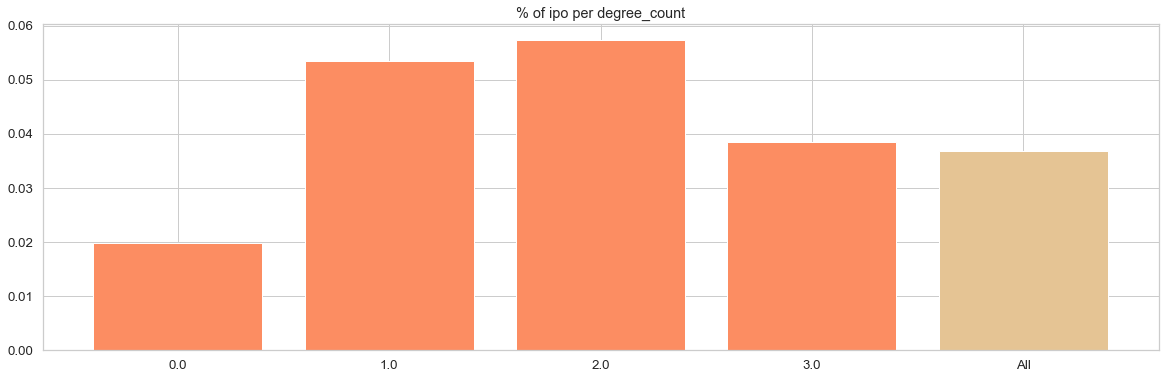

In [1050]:
colors = 4*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.index.astype(str),height=pivot_study["ipo"], color=colors)
plt.title("% of ipo per degree_count")
plt.show()

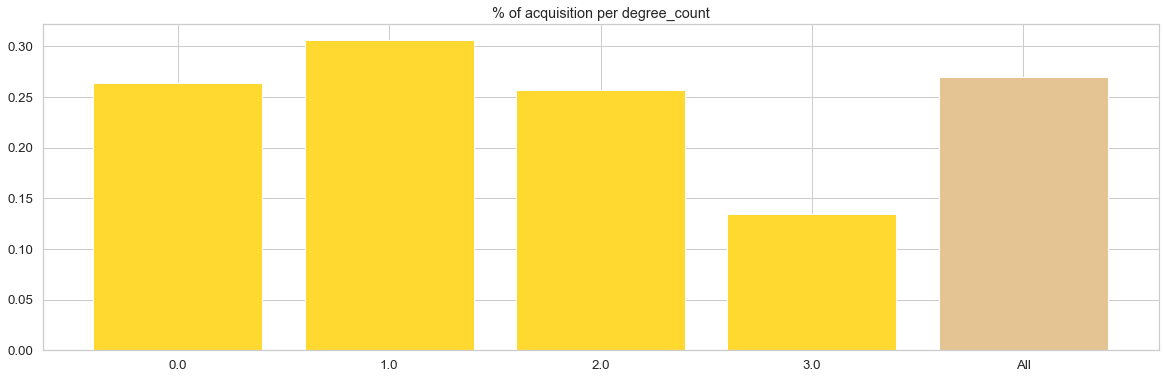

In [1049]:
colors = 4*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per degree_count")
plt.show()

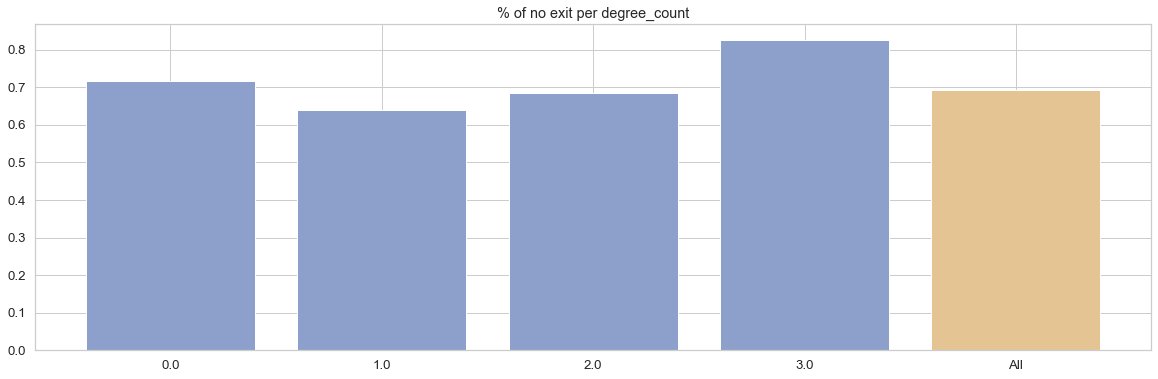

In [1051]:
colors = 4*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["no exit"], color=colors)
plt.title("% of no exit per degree_count")
plt.show()

## Companies founded before

In [577]:
def clean_founded_before(x):
    if pd.isnull(x):
        return np.nan
    elif x == 0:
        return 0
    else:
        return 1

In [578]:
companies["comp_founded_before_bool"] = companies["mean_comp_founded_before"].map(clean_founded_before)

In [580]:
pivot_exp = pd.pivot_table(companies, values='id', index=["comp_founded_before_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_exp = pivot_exp.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_exp.acquisition = pivot_exp.acquisition/pivot_exp.All
pivot_exp.ipo = pivot_exp.ipo/pivot_exp.All
pivot_exp["no exit"] = pivot_exp["no exit"]/pivot_exp.All

In [581]:
pivot_exp

exit,acquisition,ipo,no exit,All
comp_founded_before_bool,,,,
0.0,0.265076,0.037111,0.697813,1509
1.0,0.340659,0.032967,0.626374,91
All,0.269375,0.036875,0.693750,1600


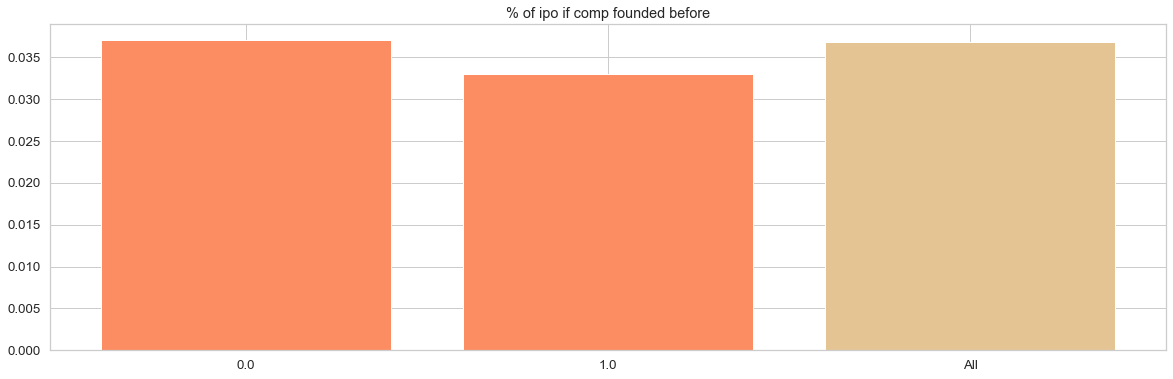

In [582]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["ipo"], color=colors)
plt.title("% of ipo if comp founded before")
plt.show()

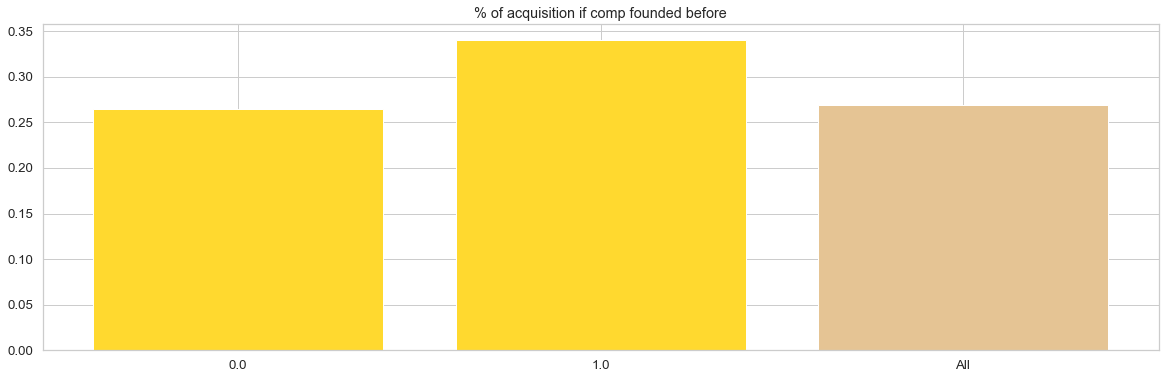

In [583]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["acquisition"], color=colors)
plt.title("% of acquisition if comp founded before")
plt.show()

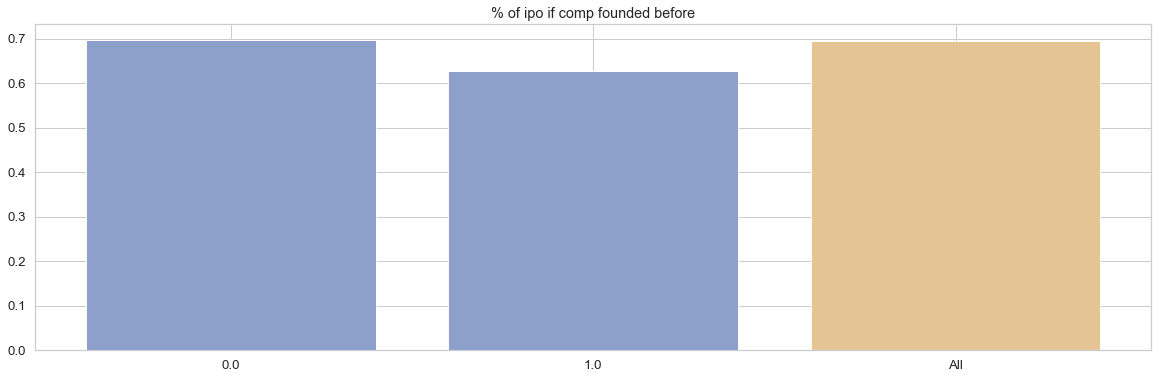

In [584]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["no exit"], color=colors)
plt.title("% of ipo if comp founded before")
plt.show()

## Companies worked before

In [1068]:
def clean_founded_before(x):
    if pd.isnull(x):
        return np.nan
    elif x >=2:
        return 2
    else:
        return round(x)

In [1069]:
companies["comp_worked_before"] = companies["mean_comp_worked_before"].map(clean_founded_before)

In [1070]:
pivot_exp = pd.pivot_table(companies, values='id', index=["comp_worked_before"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_exp = pivot_exp.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_exp.acquisition = pivot_exp.acquisition/pivot_exp.All
pivot_exp.ipo = pivot_exp.ipo/pivot_exp.All
pivot_exp["no exit"] = pivot_exp["no exit"]/pivot_exp.All

In [1071]:
pivot_exp

exit,acquisition,ipo,no exit,All
comp_worked_before,,,,
0.0,0.254570,0.037915,0.707515,1477
1.0,0.435185,0.027778,0.537037,108
2.0,0.571429,0.000000,0.428571,14
All,0.269543,0.036898,0.693558,1599


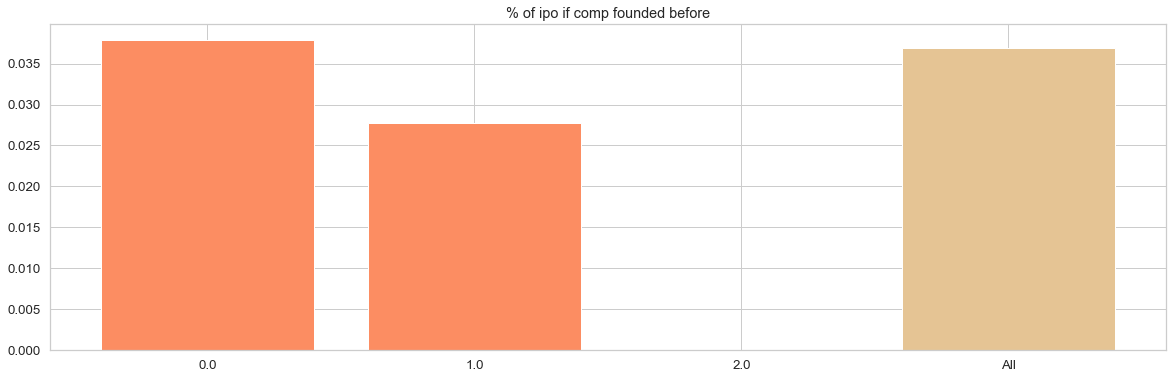

In [1075]:
colors = 3*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["ipo"], color=colors)
plt.title("% of ipo if comp founded before")
plt.show()

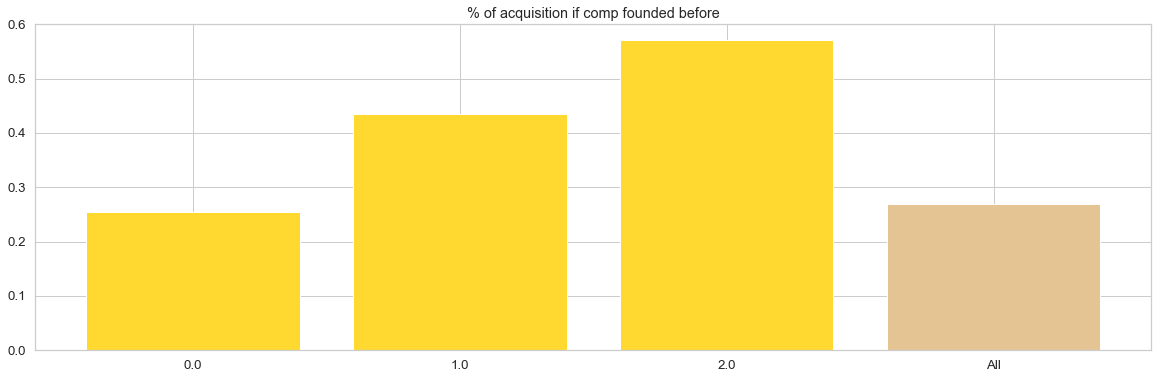

In [1077]:
colors = 3*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["acquisition"], color=colors)
plt.title("% of acquisition if comp founded before")
plt.show()

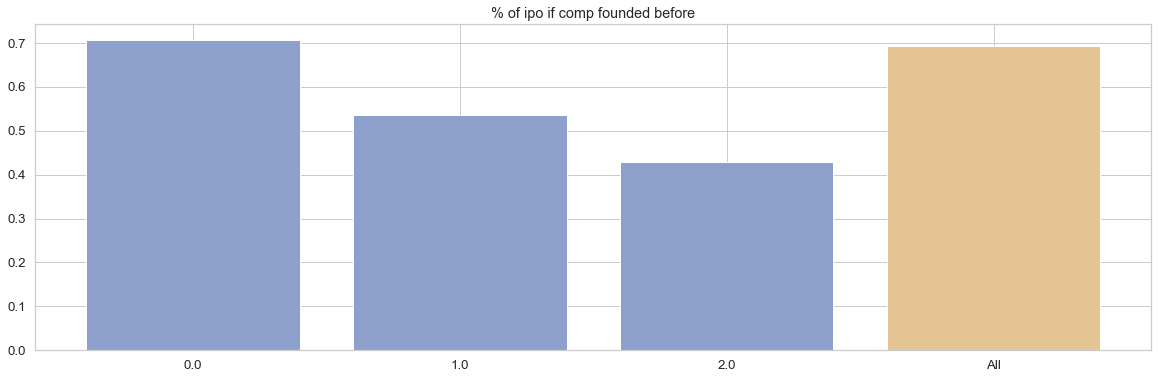

In [1078]:
colors = 3*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["no exit"], color=colors)
plt.title("% of ipo if comp founded before")
plt.show()

In [585]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 0 to 3240
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         3241 non-null   object        
 1   normalized_name            3241 non-null   object        
 2   category_code              3115 non-null   object        
 3   founded_at                 2642 non-null   datetime64[ns]
 4   description                3239 non-null   object        
 5   closed_at                  360 non-null    object        
 6   status                     3241 non-null   object        
 7   exit                       3241 non-null   object        
 8   exit_date                  797 non-null    object        
 9   country_code               3118 non-null   object        
 10  state_code                 2241 non-null   object        
 11  date_series_a              3241 non-null   datetime64[ns]
 12  partic

# Series A

## Date Series A 

In [699]:
def clean_date(x):
    if pd.isnull(x):
        return np.nan
    elif str(x) > "1998":
        return str(x)
    else:
        return "1998"

In [700]:
companies["series_a_year"] = companies.date_series_a.map(lambda x: np.nan if pd.isnull(x) else x).dt.strftime('%Y').map(clean_date)

In [701]:
pivot_series = pd.pivot_table(companies, values='id', index=["series_a_year"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0).sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [702]:
pivot_series

exit,acquisition,ipo,no exit,All
series_a_year,,,,
All,0.225548,0.022215,0.752237,3241
2008,0.155676,0.009730,0.834595,925
2007,0.215488,0.011223,0.773288,891
2006,0.253566,0.023772,0.722662,631
2005,0.268191,0.020790,0.711019,481
2004,0.265487,0.070796,0.663717,113
2000,0.291667,0.145833,0.562500,48
2003,0.326087,0.065217,0.608696,46
1999,0.535714,0.178571,0.285714,28


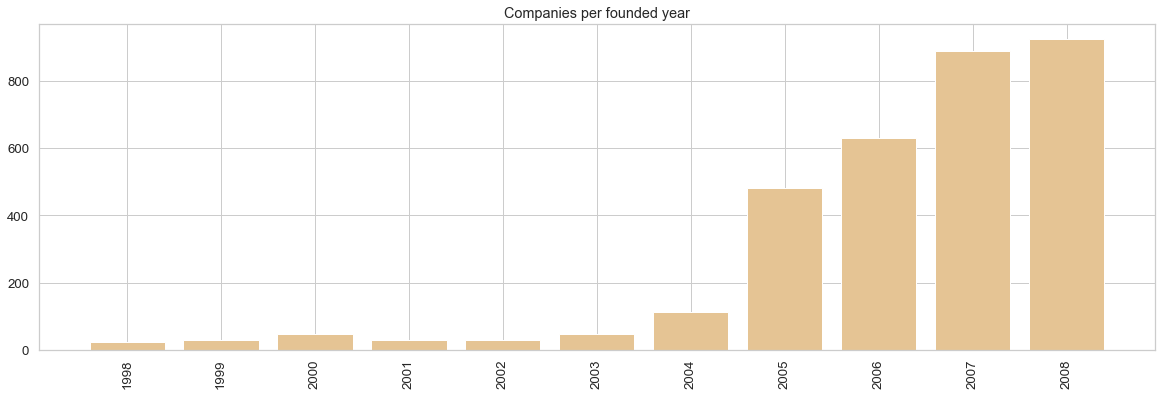

In [703]:
plt.figure(figsize=(20,6))
plt.bar(pivot_series.sort_index().drop("All").index,height=pivot_series.sort_index().drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.xticks(rotation=90)
#plt.xlim("1994", "2008")
plt.title("Companies per founded year")
plt.show()

### Predictors of IPO

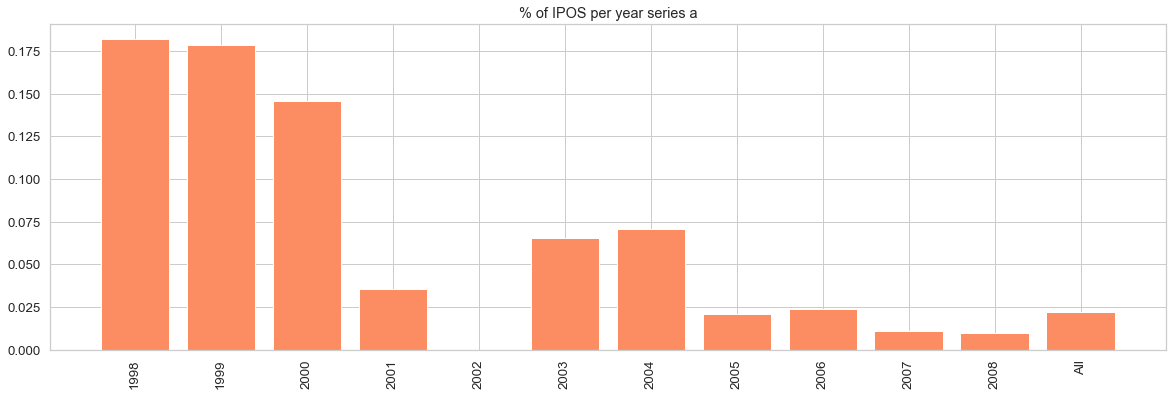

In [704]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).sort_index().index,height=pivot_series["ipo"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per year series a")
plt.show()

### Predictors of Acquisition

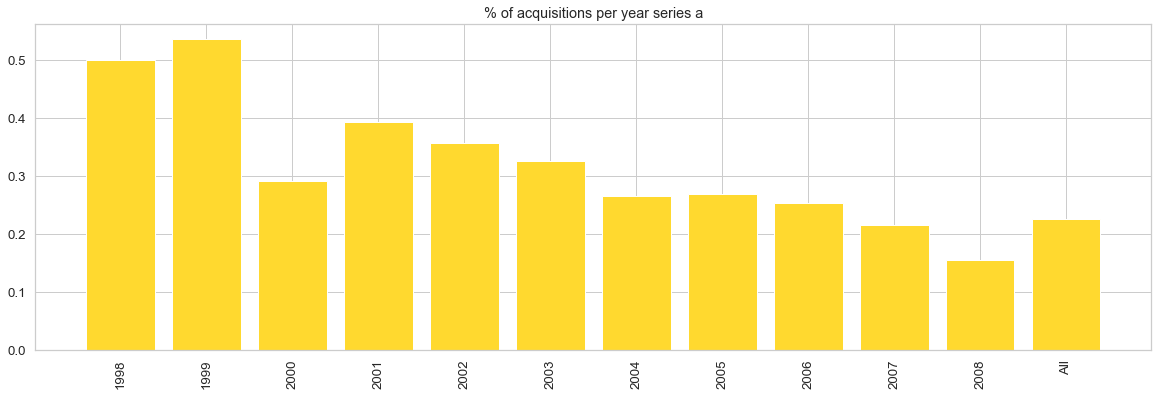

In [705]:
colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).sort_index().index,height=pivot_series["acquisition"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per year series a")
plt.show()

### Predictors of No exit

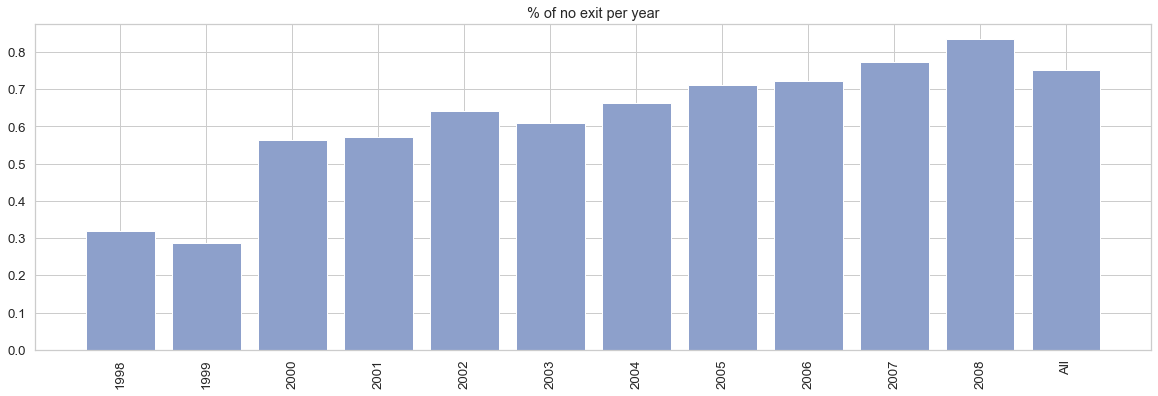

In [706]:
colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).sort_index().index,height=pivot_series["no exit"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per year")
plt.show()

### Conclusion: to use as categorical features

## Time Diff Series A to now 

In [708]:
def clean_series_a(x):
    if pd.isnull(x):
        return np.nan
    elif x >= 10:
        return 10
    else:
        return x

In [709]:
companies["time_diff_series_a_now"] = round(-(companies.date_series_a - pd.to_datetime("31-12-2013"))/np.timedelta64(12, 'M')).map(clean_series_a)

In [710]:
companies["time_diff_series_a_now"]

0        7.0
1        7.0
2        7.0
3       10.0
4       10.0
        ... 
3236     6.0
3237     6.0
3238     7.0
3239     5.0
3240     6.0
Name: time_diff_series_a_now, Length: 3241, dtype: float64

In [866]:
pivot_series = pd.pivot_table(companies, values='id', index=["time_diff_series_a_now"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [867]:
pivot_series

exit,acquisition,ipo,no exit,All
time_diff_series_a_now,,,,
5.0,0.167683,0.009146,0.823171,328
6.0,0.166494,0.011375,0.822130,967
7.0,0.237913,0.017812,0.744275,786
8.0,0.254701,0.020513,0.724786,585
9.0,0.288026,0.019417,0.692557,309
10.0,0.338346,0.097744,0.563910,266
All,0.225548,0.022215,0.752237,3241


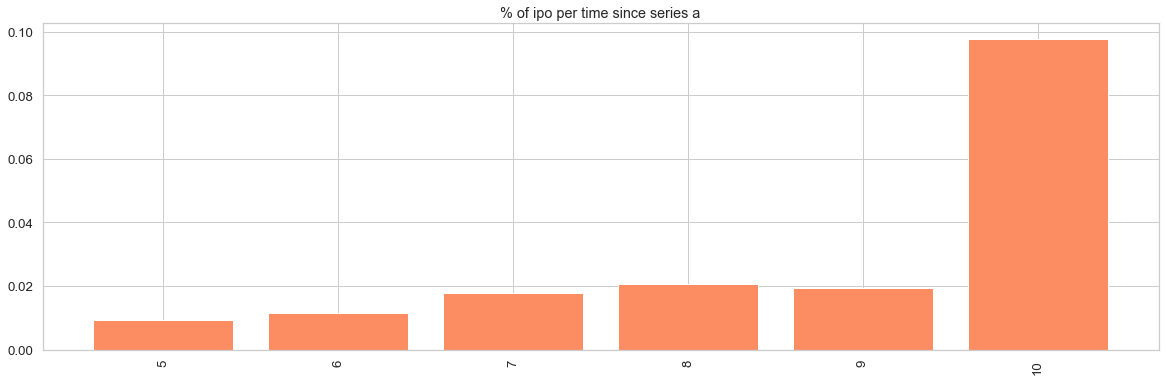

In [714]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).drop("All").sort_index().index,height=pivot_series["ipo"].head(14).drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per time since series a")
plt.show()

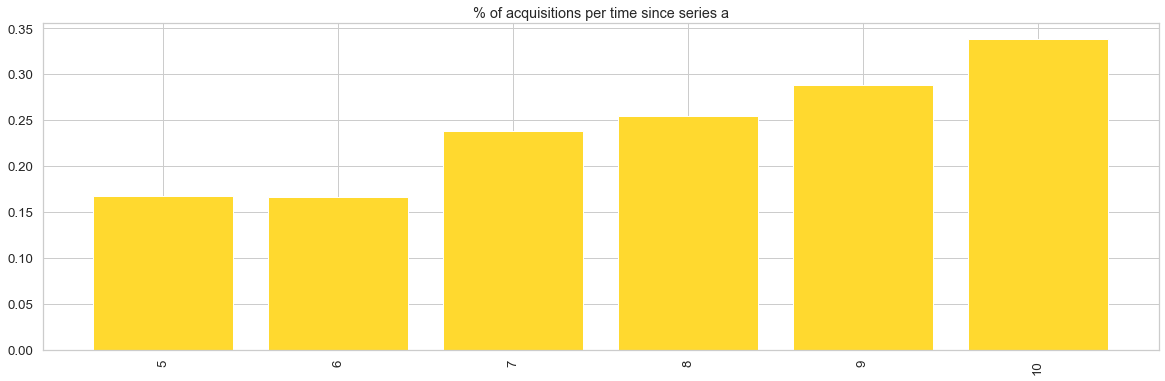

In [719]:
 colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).drop("All").sort_index().index,height=pivot_series["acquisition"].head(14).drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per time since series a")
plt.show()

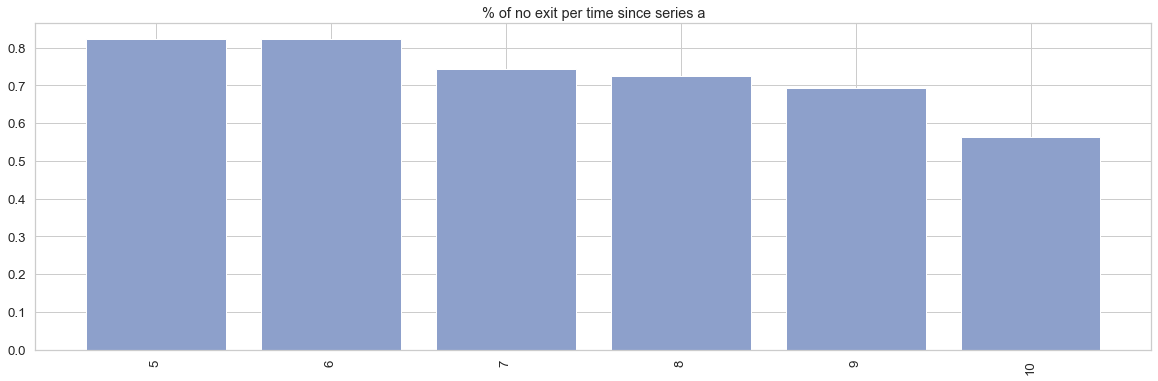

In [716]:
 colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).drop("All").sort_index().index,height=pivot_series["no exit"].head(14).drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per time since series a")
plt.show()

### Investors (Participants)



In [765]:
def clean_participants(x):
    if pd.isnull(x):
        return np.nan
    elif x==0:
        return np.nan
    elif x <= 4:
        return int(x)
    else:
        return 5

In [766]:
companies["participants_a_cl"] = companies.participants_a.map(clean_participants)

In [767]:
pivot_series = pd.pivot_table(companies, values='id', index=["participants_a_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [768]:
pivot_series

exit,acquisition,ipo,no exit,All
participants_a_cl,,,,
1.0,0.182258,0.018548,0.799194,1240
2.0,0.258741,0.024476,0.716783,858
3.0,0.276347,0.025761,0.697892,427
4.0,0.257310,0.023392,0.719298,171
5.0,0.351724,0.027586,0.620690,145
All,0.232665,0.022175,0.745160,2841


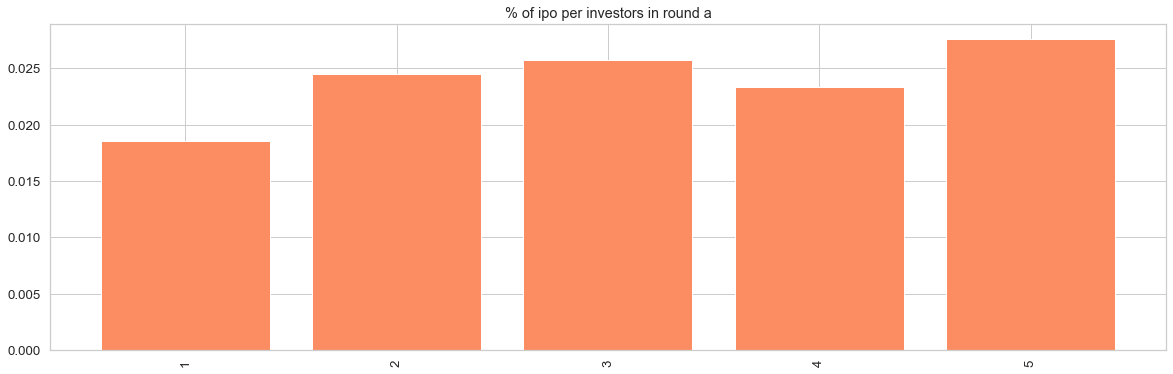

In [769]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["ipo"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

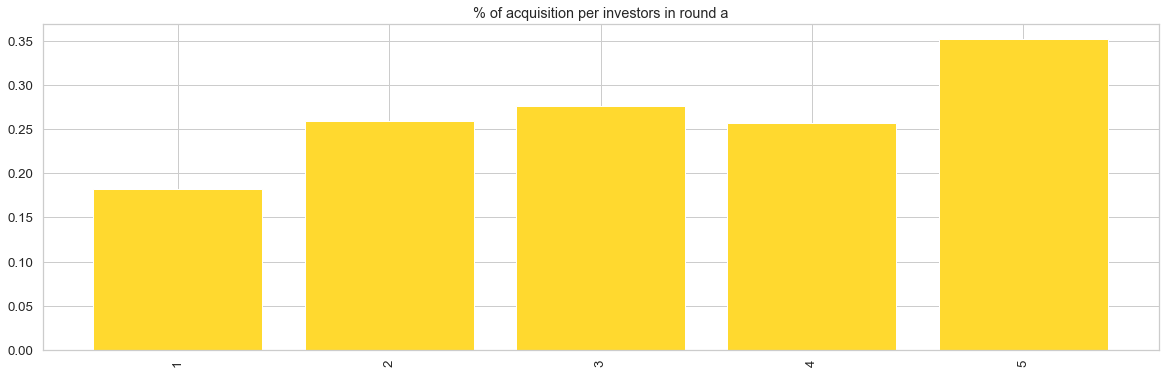

In [770]:
colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["acquisition"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisition per investors in round a")
plt.show()

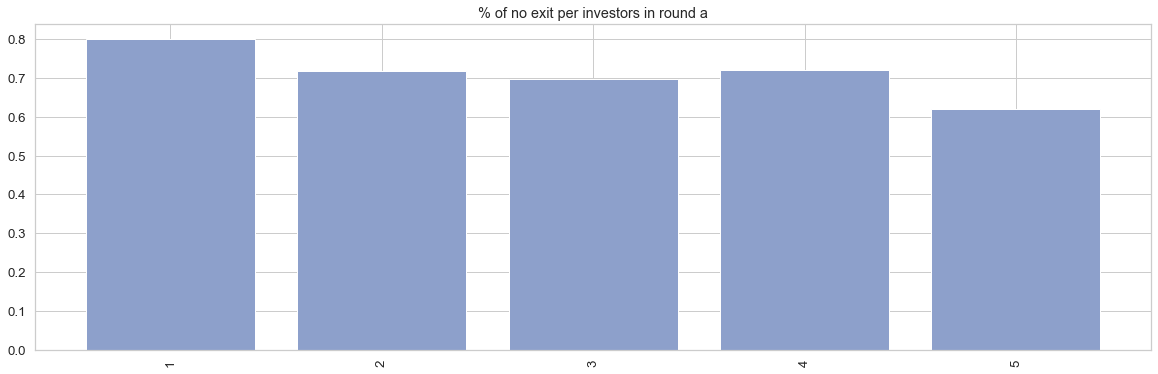

In [771]:
colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["no exit"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per investors in round a")
plt.show()

## Amount raised at A

In [839]:
def clean_amount(x):
    if pd.isnull(x):
        return np.nan
    elif x == 0:
        return np.nan
    elif x< 1000000:
        return 1000000
    elif x< 3000000:
        return 3000000
    elif x< 5000000:
        return 5000000
    elif x< 10000000:
        return 10000000
    elif x< 20000000:
        return 20000000
    elif x< 50000000:
        return 50000000    
    else:
        return 100000000

In [840]:
companies["raised_amount_usd_a_cl"] = companies.raised_amount_usd_a.map(clean_amount)

In [841]:
pivot_series = pd.pivot_table(companies, values='id', index=["raised_amount_usd_a_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [842]:
pivot_series

exit,acquisition,ipo,no exit,All
raised_amount_usd_a_cl,,,,
1000000.0,0.164948,0.010309,0.824742,194
3000000.0,0.182836,0.013682,0.803483,804
5000000.0,0.247961,0.008157,0.743883,613
10000000.0,0.257242,0.028969,0.713789,863
20000000.0,0.262048,0.036145,0.701807,332
50000000.0,0.178295,0.085271,0.736434,129
100000000.0,0.162162,0.054054,0.783784,37
All,0.225101,0.022880,0.752019,2972


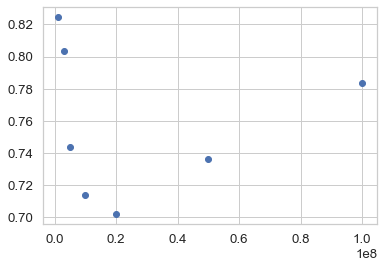

In [843]:
plt.scatter(pivot_series.drop("All").index, pivot_series.drop("All")[["no exit"]])

/Users/joannavitiello/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='raised_amount_usd_a_cl'>

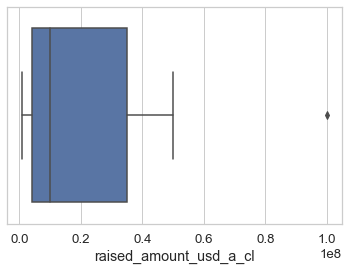

In [845]:
sns.boxplot(pivot_series.drop("All").index)

In [833]:
np.quantile(pivot_series.drop("All").index, 0.75)

17500000.0

In [834]:
np.quantile(pivot_series.drop("All").index, 0.5)

7500000.0

In [835]:
np.quantile(pivot_series.drop("All").index, 0.25)

3500000.0

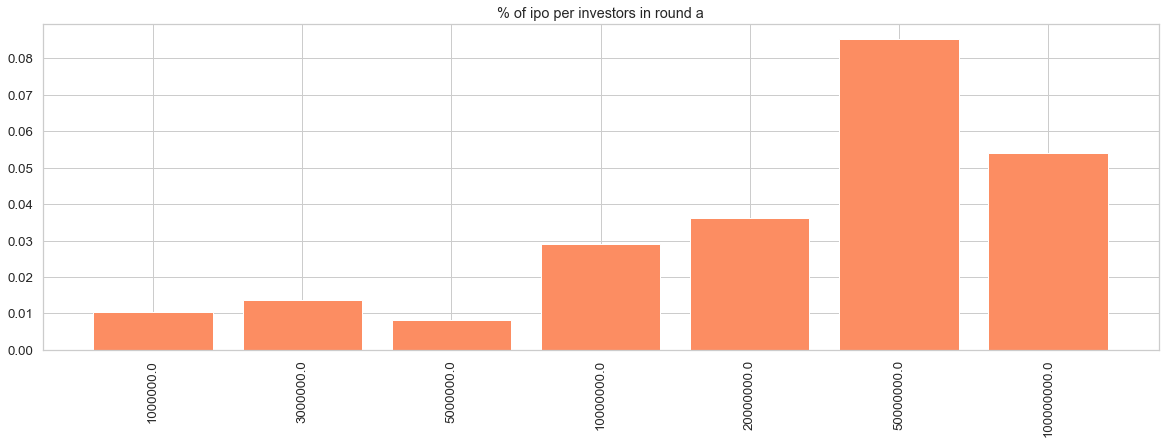

In [844]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index.astype(str),height=pivot_series["ipo"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

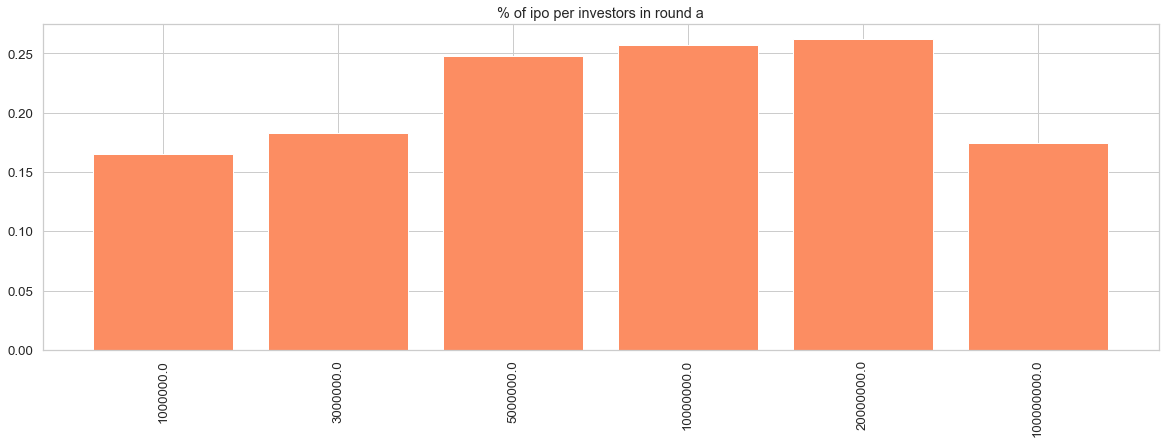

In [837]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index.astype(str),height=pivot_series["acquisition"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

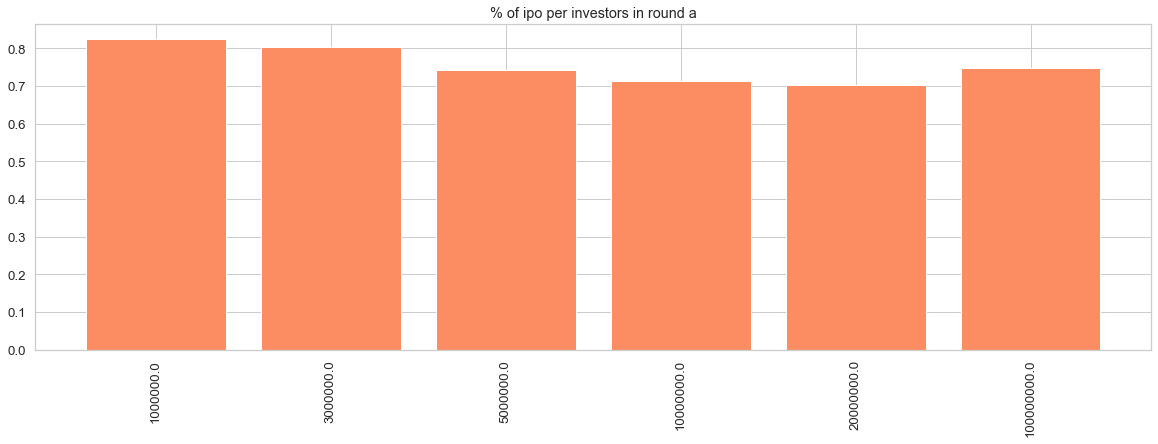

In [838]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index.astype(str),height=pivot_series["no exit"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

## timediff_founded_series_a

In [897]:
def clean_series_a(x):
    if pd.isnull(x):
        return np.nan
    elif x <=1:
        return "1_less"
    elif x>=10: 
        return "10_more"
    else:
        return "2_9"

In [898]:
companies["timediff_cl"]= companies.timediff_founded_series_a.map(clean_series_a)

In [899]:
pivot_series = pd.pivot_table(companies, values='id', index=["timediff_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [900]:
pivot_series

exit,acquisition,ipo,no exit,All
timediff_cl,,,,
10_more,0.156250,0.031250,0.812500,96
1_less,0.255388,0.037716,0.706897,928
2_9,0.211372,0.018541,0.770087,1618
All,0.224830,0.025738,0.749432,2642


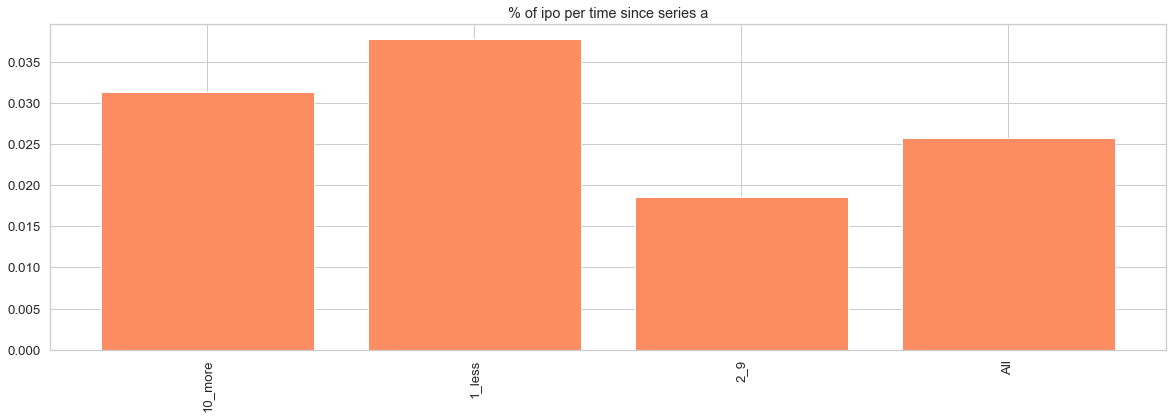

In [901]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).sort_index().index,height=pivot_series["ipo"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per time since series a")
plt.show()

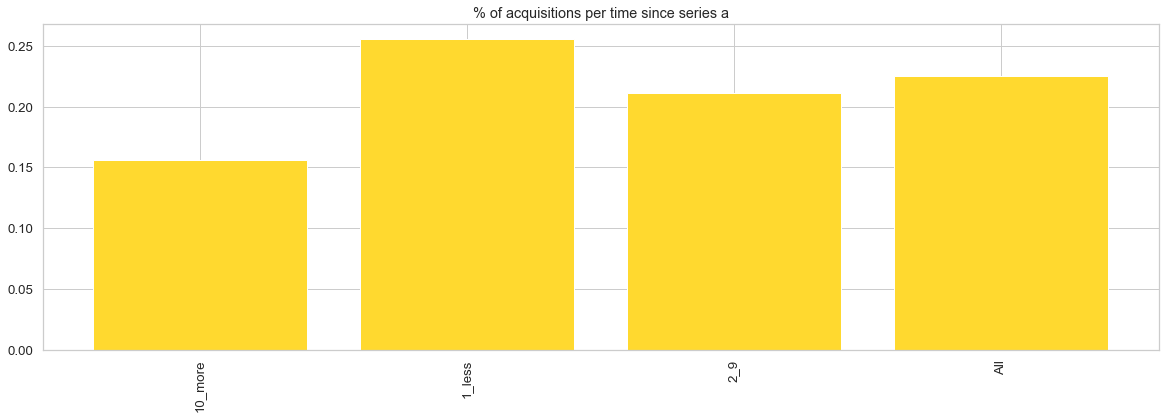

In [902]:
 colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).sort_index().index,height=pivot_series["acquisition"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per time since series a")
plt.show()

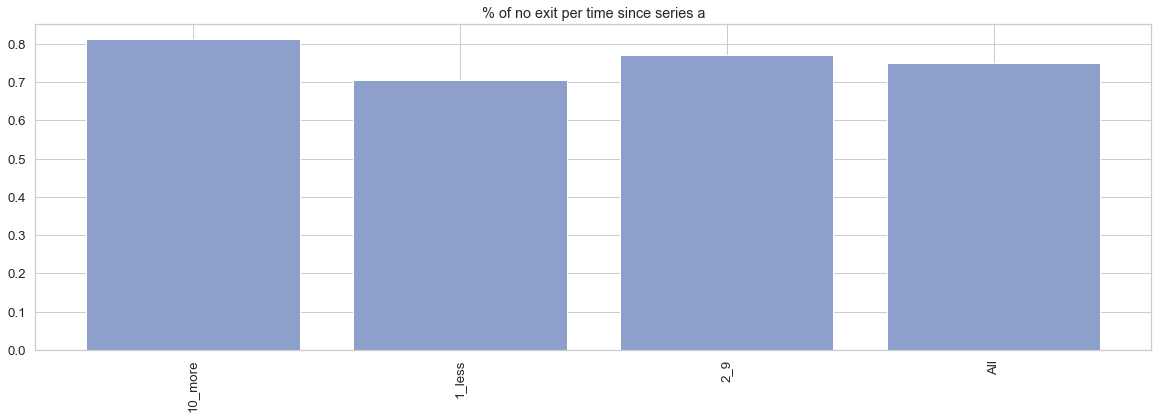

In [903]:
 colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.head(14).sort_index().index,height=pivot_series["no exit"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per time since series a")
plt.show()

# Pre Series A

### Investors (Participants) - not very indicative

In [915]:
def clean_participants(x):
    if pd.isnull(x):
        return np.nan
    elif x==0:
        return np.nan
    elif x <= 4:
        return int(x)
    else:
        return 5

In [916]:
companies["participants_before_a_cl"] = companies.participants_before_a.map(clean_participants)

In [917]:
pivot_series = pd.pivot_table(companies, values='id', index=["participants_before_a_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [918]:
pivot_series

exit,acquisition,ipo,no exit,All
participants_before_a_cl,,,,
1.0,0.266667,0.030303,0.703030,165
2.0,0.407407,0.055556,0.537037,54
3.0,0.303030,0.060606,0.636364,33
4.0,0.500000,0.000000,0.500000,14
5.0,0.466667,0.000000,0.533333,30
All,0.327703,0.033784,0.638514,296


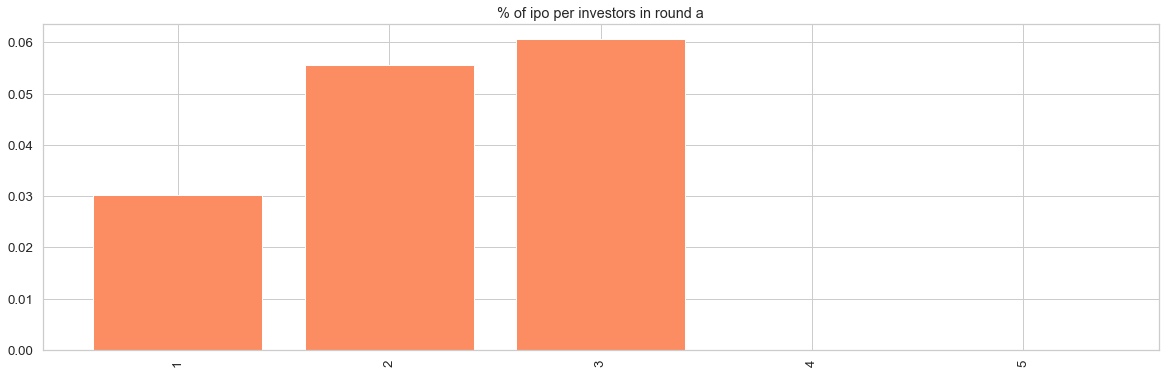

In [919]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["ipo"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

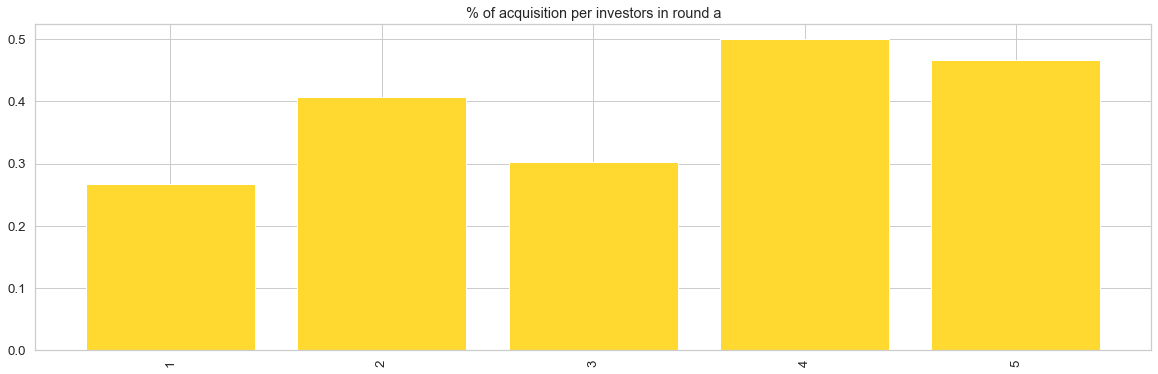

In [920]:
colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["acquisition"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisition per investors in round a")
plt.show()

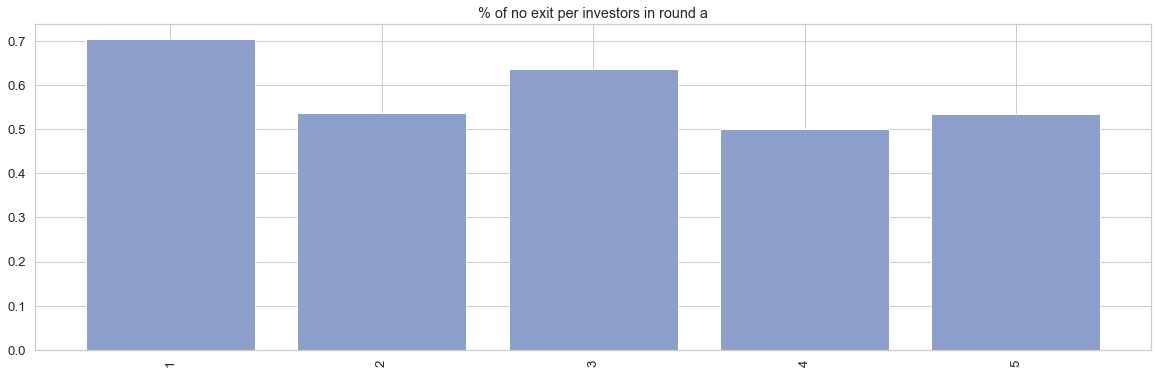

In [921]:
colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["no exit"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per investors in round a")
plt.show()

## Amount before at A

In [932]:
def clean_amount(x):
    if pd.isnull(x):
        return np.nan
    elif x == 0:
        return np.nan
    elif x< 1000000:
        return 1000000
    elif x< 3000000:
        return 3000000
    elif x< 5000000:
        return 5000000
    elif x< 10000000:
        return 10000000
    elif x< 20000000:
        return 20000000
    else:
        return 50000000

In [933]:
companies["raised_before_a_cl"] = companies.raised_before_a.map(clean_amount)

In [934]:
pivot_series = pd.pivot_table(companies, values='id', index=["raised_before_a_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [935]:
pivot_series

exit,acquisition,ipo,no exit,All
raised_before_a_cl,,,,
1000000.0,0.301205,0.012048,0.686747,166
3000000.0,0.247706,0.009174,0.743119,109
5000000.0,0.235294,0.058824,0.705882,17
10000000.0,0.266667,0.000000,0.733333,15
20000000.0,0.461538,0.000000,0.538462,13
50000000.0,0.000000,0.000000,1.000000,3
All,0.281734,0.012384,0.705882,323


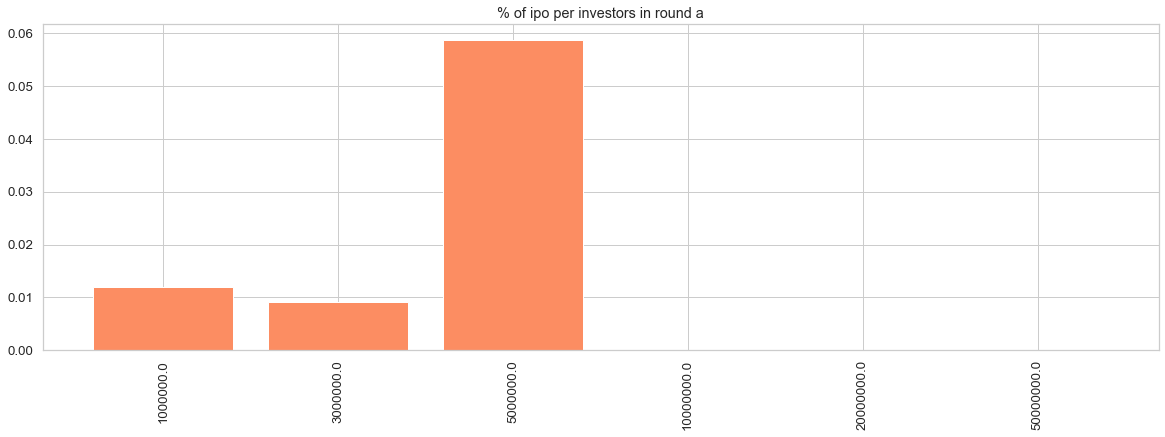

In [938]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index.astype(str),height=pivot_series["ipo"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

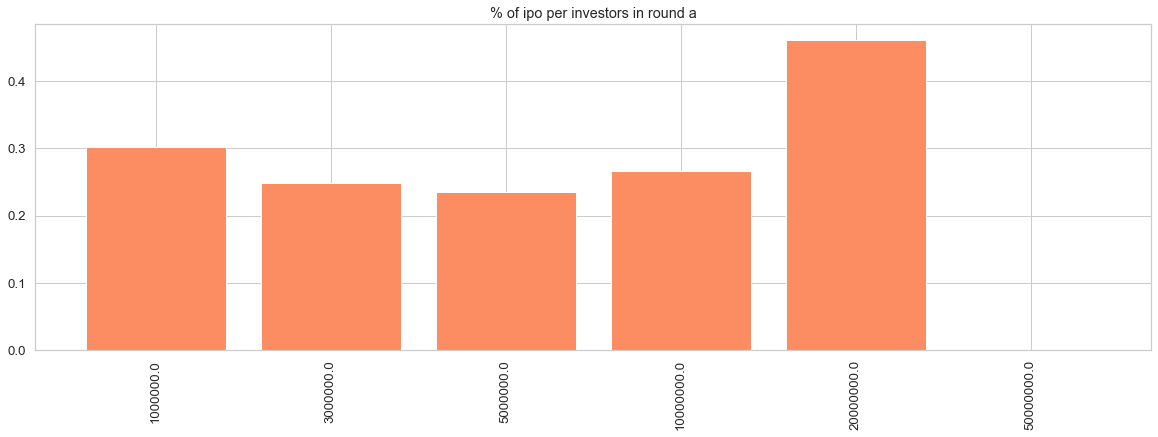

In [939]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index.astype(str),height=pivot_series["acquisition"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

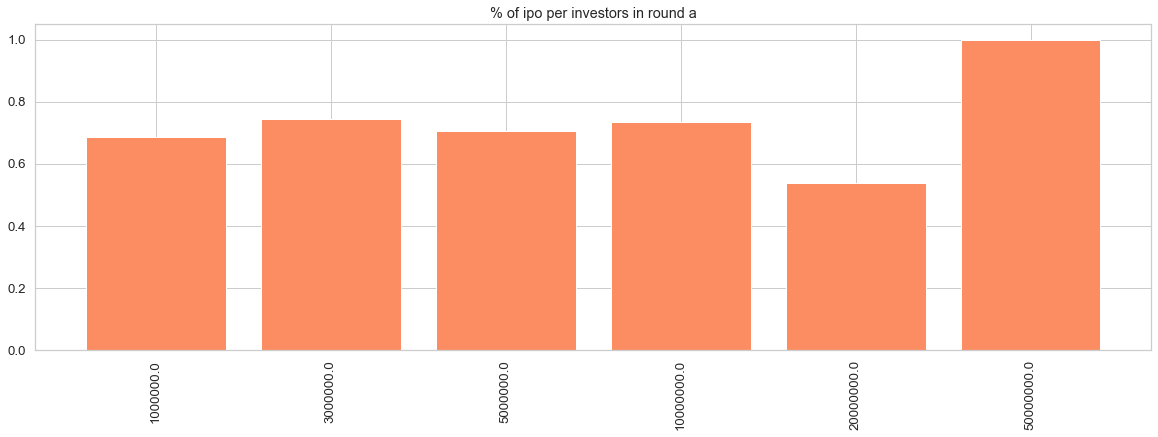

In [940]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index.astype(str),height=pivot_series["no exit"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

## Rounds before a

In [948]:
def clean_rounds(x):
    if pd.isnull(x):
        return np.nan
    elif x==0:
        return 0
    elif x == 1:
        return 1
    else:
        return 2

In [949]:
companies["rounds_before_a"] = companies.rounds_before_a.map(clean_rounds)

In [950]:
pivot_series = pd.pivot_table(companies, values='id', index=["rounds_before_a"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_series = pivot_series.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_series.acquisition = pivot_series.acquisition/pivot_series.All
pivot_series.ipo = pivot_series.ipo/pivot_series.All
pivot_series["no exit"] = pivot_series["no exit"]/pivot_series.All

In [951]:
pivot_series

exit,acquisition,ipo,no exit,All
rounds_before_a,,,,
0,0.217101,0.021816,0.761084,2842
1,0.273481,0.027624,0.698895,362
2,0.405405,0.000000,0.594595,37
All,0.225548,0.022215,0.752237,3241


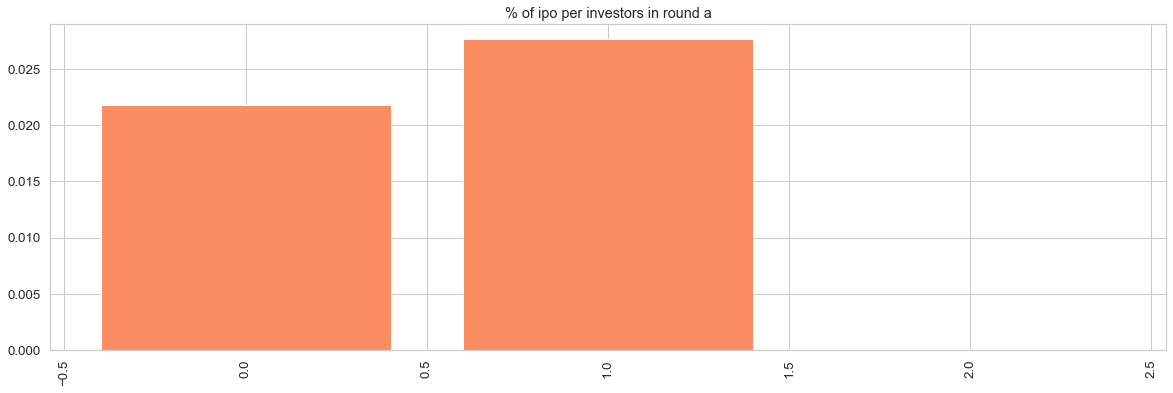

In [952]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["ipo"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of ipo per investors in round a")
plt.show()

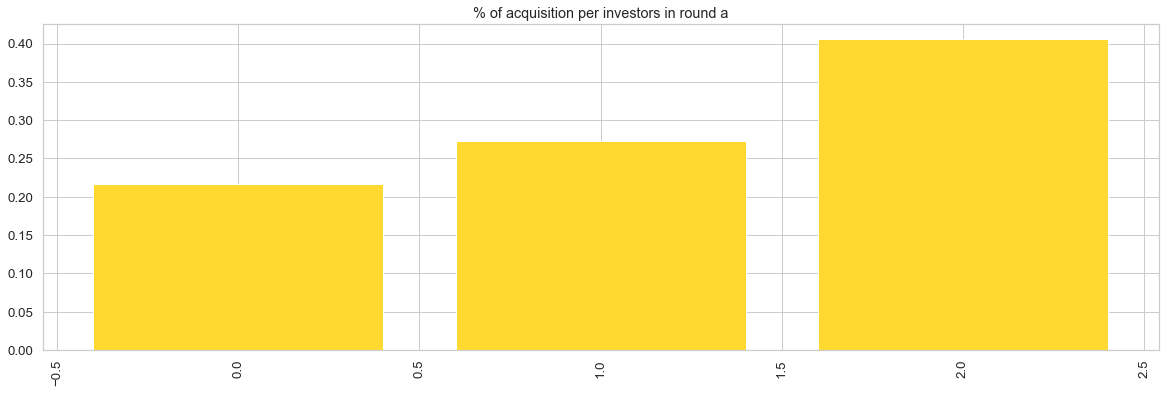

In [953]:
colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["acquisition"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisition per investors in round a")
plt.show()

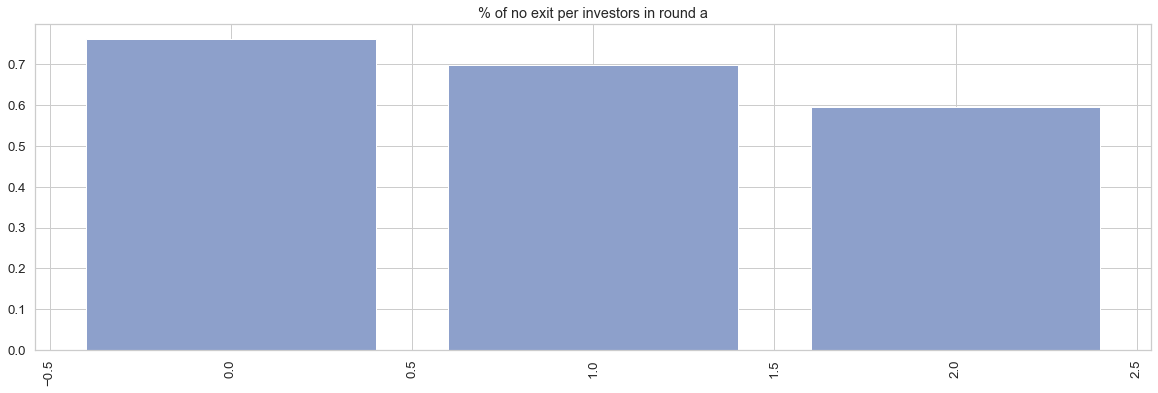

In [954]:
colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_series.drop("All").sort_index().index,height=pivot_series["no exit"].drop("All").sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per investors in round a")
plt.show()

In [941]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 0 to 3240
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         3241 non-null   object        
 1   normalized_name            3241 non-null   object        
 2   category_code              3115 non-null   object        
 3   founded_at                 2642 non-null   datetime64[ns]
 4   description                3239 non-null   object        
 5   closed_at                  360 non-null    object        
 6   status                     3241 non-null   object        
 7   exit                       3241 non-null   object        
 8   exit_date                  797 non-null    object        
 9   country_code               3118 non-null   object        
 10  state_code                 2241 non-null   object        
 11  date_series_a              3241 non-null   datetime64[ns]
 12  partic